# Small Business Administration (SBA) Loan Default Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv('SBAnational.csv')
df

C:\Users\Vicqy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [3]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

## Column Description

In [5]:
pd.read_csv('table explanation.csv')

,Variable name,Data type,Description of variable
0,LoanNr_ChkDgt,Text,Identifier – Primary key
1,Name,Text,Borrower name
2,City,Text,Borrower city
3,State,Text,Borrower state
4,Zip,Text,Borrower zip code
5,Bank,Text,Bank name
6,BankState,Text,Bank state
7,NAICS,Text,North American industry classification system ...
8,ApprovalDate,Date/Time,Date SBA commitment issued
9,ApprovalFY,Text,Fiscal year of commitment


In [6]:
nan_count = []
nan_percentage = []
unique_count = []
column_type = []

for column in df.columns:
    nan_count.append(np.sum(df[column].isna()))
    nan_percentage.append(np.sum(df[column].isna())/len(df))
    unique_count.append(df[column].nunique())
    column_type.append(df[column].dtype)
    
pd.set_option('max_colwidth', 100)
pd.DataFrame({'column_name':df.columns, 'nan_count':nan_count, 'nan_percentage':nan_percentage, 'unique_count':unique_count,
              'column_type':column_type, 'actual_column_type':pd.read_csv('table explanation.csv')['Data type'],
              'colum_description':pd.read_csv('table explanation.csv')['Description of variable']})

,column_name,nan_count,nan_percentage,unique_count,column_type,actual_column_type,colum_description
0,LoanNr_ChkDgt,0,0.000000,899164,int64,Text,Identifier – Primary key
1,Name,14,0.000016,779583,object,Text,Borrower name
2,City,30,0.000033,32581,object,Text,Borrower city
3,State,14,0.000016,51,object,Text,Borrower state
4,Zip,0,0.000000,33611,int64,Text,Borrower zip code
5,Bank,1559,0.001734,5802,object,Text,Bank name
6,BankState,1566,0.001742,56,object,Text,Bank state
7,NAICS,0,0.000000,1312,int64,Text,North American industry classification system code
8,ApprovalDate,0,0.000000,9859,object,Date/Time,Date SBA commitment issued
9,ApprovalFY,0,0.000000,70,object,Text,Fiscal year of commitment


We can see there's a number of missing data in the dataset. Therefor we need to do some data cleaning to tidy up the data.

In [7]:
pd.set_option('max_columns', 27)
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


## Data Cleaning

In [8]:
type(float('$60,000.00'.replace('$', '').replace('.00', '').replace(',', '')))

float

### Removing Dollar Sign From the Currency-type Columns

In [9]:
# fungsi untuk menghilangkan simbol dollar pada column bertipe currency

def currency_to_float(x):
    if ',' in x:
        return float(x.replace('$', '').replace('.00', '').replace(',', ''))
    else:
        return float(x.replace('$', '').replace('.00', ''))

for column in ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']:
    df[column] = df[column].apply(currency_to_float)

In [10]:
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

### Changing Date-type Column into datetime Data Type

In [12]:
for column in ['ApprovalDate', 'ChgOffDate', 'DisbursementDate']:
    df[column] = pd.to_datetime(df[column])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

### Changing Categorical Column Data Type into Object

In [14]:
for column in ['LoanNr_ChkDgt', 'Zip', 'NAICS', 'NewExist', 'FranchiseCode', 'UrbanRural']:
    df[column] = df[column].astype(object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  object        
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  object        
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  object        
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  object        
 13  CreateJob          899164 non-null  int64   

In [16]:
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [17]:
df[df.ApprovalFY == '1976A']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
699732,7268591001,FASHION NOVELTY CORP OF NJ,CARLSTADT,NJ,7072,VALLEY NATIONAL BANK,NJ,0,1976-09-29,1976A,120,36,1,0,0,0,0,N,N,1993-07-09,1976-11-23,350000.0,0.0,CHGOFF,48361.0,350000.0,315000.0
704030,7319361003,J W HUGHES HUGHES 66 GLDN PLNS,FOLLETT,TX,79034,FIRSTBANK SOUTHWEST,TX,0,1976-09-17,1976A,120,29,1,0,0,0,0,N,N,1988-11-23,1976-12-01,325000.0,0.0,CHGOFF,45910.0,325000.0,292500.0
705375,7334771006,CROWN POINT LUMBER,CROWN POINT,IN,46307,JPMORGAN CHASE BANK NATL ASSOC,IN,0,1976-09-10,1976A,120,5,2,0,0,0,0,N,N,1992-12-30,1977-02-07,145000.0,0.0,CHGOFF,0.0,145000.0,130500.0
710381,7389331000,BAUMAN'S APPLIANCE,ODESSA,NY,14869,CHEMUNG CANAL TRUST COMPANY,NY,0,1976-07-19,1976A,60,2,2,0,0,0,0,N,N,1989-04-03,1976-08-09,15000.0,0.0,CHGOFF,475.0,15000.0,13500.0
713245,7420741004,THE TOGGERY,SPRINGFIELD,MA,1103,BANK OF AMERICA NATL ASSOC,RI,0,1976-08-30,1976A,84,5,1,0,0,0,0,N,N,1989-06-29,NaT,73000.0,0.0,CHGOFF,827.0,73000.0,40150.0
748029,7799101004,"JUSTIN TYME,INC.",COLUMBUS,OH,43265,"PNC BANK, NATIONAL ASSOCIATION",OH,0,1976-08-20,1976A,102,10,1,0,0,0,0,N,N,1988-12-19,1976-09-15,150000.0,0.0,CHGOFF,87037.0,150000.0,135000.0
751519,7848911008,MICHAELS TRUCK STOP,CHICAGO,IL,60633,BANK OF AMERICA NATL ASSOC,NC,0,1976-09-29,1976A,120,3,2,0,0,0,0,N,N,1989-03-10,NaT,550000.0,0.0,CHGOFF,572877.0,550000.0,495000.0
769515,8108191005,MIKE ESPARZA FUNERAL HOME,UVALDE,TX,78801,BANK OF AMERICA NATL ASSOC,TX,0,1976-07-19,1976A,240,1,2,0,0,0,0,N,N,1991-04-19,1977-03-29,85000.0,0.0,CHGOFF,63850.0,85000.0,76500.0
775002,8191291000,JUG & JIGGER,YUCAIPA,CA,92399,BANK OF AMERICA NATL ASSOC,CA,0,1976-08-20,1976A,84,3,1,0,0,0,0,N,N,1991-10-01,1976-09-20,94500.0,0.0,CHGOFF,63182.0,94500.0,85050.0
775430,8197661005,FANGMAN CABINET SHOP,DYERSVILLE,IA,52040,FDIC/DYERSVILLE,IL,0,1976-08-26,1976A,120,9,1,0,0,0,0,N,N,1992-04-01,1977-01-03,72000.0,0.0,P I F,8509.0,72000.0,64800.0


In [18]:
df.ApprovalFY = df.ApprovalFY.apply(lambda x: int(x.replace('A', '')) if 'A' in str(x) else int(x))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  object        
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  object        
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  object        
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  int64         
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  object        
 13  CreateJob          899164 non-null  int64   

### Missing Data Exploration

In [20]:
# Coba untuk drop semua row dengan NaN value
df.dropna().shape

(160871, 27)

In [21]:
# Coba untuk drop semua kolom dengan NaN value
df.dropna(axis=1).shape

(899164, 16)

#### Missing Value in Name Column

In [22]:
df[df.Name.isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
272,1002095005,NaN,Logan,UT,84321,JPMORGAN CHASE BANK NATL ASSOC,IL,421910,1998-02-17,1998,120,1,1,0,0,1,0,0,N,NaT,2000-03-31,50000.0,0.0,P I F,0.0,50000.0,25000.0
409,1003125003,NaN,Cobleskill,NY,12043,KEYBANK NATIONAL ASSOCIATION,OH,0,1998-09-11,1998,60,5,2,0,0,1,0,Y,N,NaT,1999-04-30,100000.0,0.0,P I F,0.0,100000.0,50000.0
465,1003575009,NaN,Tarrytown,NY,10591,KEYBANK NATIONAL ASSOCIATION,OH,541512,1999-02-23,1999,60,4,1,0,0,1,0,Y,N,NaT,1999-05-31,100000.0,0.0,P I F,0.0,100000.0,50000.0
466,1003585001,NaN,Mahopac,NY,10541,KEYBANK NATIONAL ASSOCIATION,OH,311920,1999-03-04,1999,40,8,1,0,0,1,0,N,N,NaT,1999-03-31,25000.0,0.0,P I F,0.0,25000.0,12500.0
51439,1395235010,NaN,Morton,IL,61550,HEARTLAND BK & TR CO,IL,811219,2005-08-01,2005,12,6,1,0,6,0,1,N,N,NaT,2006-08-31,150000.0,0.0,P I F,0.0,150000.0,75000.0
82751,1616875008,NaN,Cleveland,OH,44128,"FIRSTMERIT BANK, N.A.",OH,238350,2006-01-17,2006,84,1,2,1,0,0,1,T,N,NaT,2006-07-31,22044.0,0.0,P I F,0.0,10000.0,5000.0
103696,1763546010,NaN,LANSDALE,PA,19446,SUSQUEHANNA BANK,PA,423990,2006-04-14,2006,12,2,1,0,0,1,1,N,N,NaT,2007-02-28,340000.0,0.0,P I F,0.0,340000.0,306000.0
143179,2046175001,NaN,Waterloo,IA,50703,WELLS FARGO BANK NATL ASSOC,SD,442110,2006-09-28,2006,40,1,2,1,1,0,1,N,N,2014-08-12,2006-12-31,74500.0,0.0,CHGOFF,49935.0,74500.0,63325.0
197401,2392194003,NaN,TROY,NY,12180,MANUFACTURERS & TRADERS TR CO,NY,0,1998-10-16,1999,60,2,1,0,0,1,0,0,Y,NaT,1998-11-30,40000.0,0.0,P I F,0.0,40000.0,32000.0
197428,2392384001,NaN,E. AMHERST,NY,14051,BANK OF AMERICA NATL ASSOC,RI,811310,1998-10-16,1999,60,2,1,0,0,1,0,0,Y,NaT,1999-02-28,28000.0,0.0,P I F,0.0,28000.0,22400.0


In [23]:
df.Name.nunique()

779583

Kolom Name dan LoanNr_ChkDgt merupakan kolom kategorikal yang berisi unique value, sehingga tidak esensial untuk dilakukannya analisis dan juga pemodelan. Kolom ini dan LoanNr_ChkDgt akan di drop sehingga tidak akan dilakukan imputasi pada NaN value-nya.

In [24]:
## drop kolom LoanNr_ChkDgt dan Name
df.drop(labels=['LoanNr_ChkDgt', 'Name'], axis=1, inplace=True)

#### Missing Value in City Column

In [25]:
df[df.City.isna()]

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
42535,NaN,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,1981-12-15,1982,300,2,2,0,0,0,0,N,N,NaT,1982-01-06,190000.0,0.0,P I F,0.0,190000.0,190000.0
177891,NaN,LA,70130,NEW ORLEANS REGIONAL BUS. DEVE,LA,0,1981-12-17,1982,240,23,2,0,0,0,0,N,N,NaT,1982-02-10,500000.0,0.0,P I F,0.0,500000.0,500000.0
243450,NaN,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,1981-04-10,1981,300,10,2,0,0,0,0,N,N,NaT,1981-11-04,150000.0,0.0,P I F,0.0,150000.0,150000.0
243452,NaN,IL,60636,NaN,NaN,0,1981-05-15,1981,180,1,2,0,0,0,0,N,N,NaT,1981-11-04,49000.0,0.0,P I F,0.0,49000.0,49000.0
270263,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-04-16,1981,180,45,2,0,0,0,0,N,N,NaT,1982-01-06,488000.0,0.0,P I F,0.0,488000.0,488000.0
270265,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-06-15,1981,300,20,2,0,0,0,0,N,N,NaT,1981-09-10,203000.0,0.0,P I F,0.0,211000.0,211000.0
270268,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-06-26,1981,180,28,1,0,0,0,0,N,N,NaT,1981-09-10,407000.0,0.0,P I F,0.0,407000.0,407000.0
270270,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-07-13,1981,180,7,2,0,0,0,0,N,N,NaT,1981-09-10,105000.0,0.0,P I F,0.0,105000.0,105000.0
270277,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-07-29,1981,240,20,2,0,0,0,0,N,N,NaT,1981-09-10,159000.0,0.0,P I F,0.0,159000.0,159000.0
270284,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,1981-08-31,1981,240,26,2,0,0,0,0,N,N,NaT,1981-11-04,365000.0,0.0,P I F,0.0,365000.0,365000.0


In [26]:
df[df.Zip == 84109]['City'].value_counts()

SALT LAKE CITY               132
Salt Lake City                 2
SALT LAKE CTY                  1
SOUTH SALT LAKE                1
SALE LAKE CITY                 1
UNINCORP. SALT LAKE COUNT      1
Name: City, dtype: int64

In [27]:
df.City.nunique()

32581

We can see there's several kink of writing for a same type of city. Also, information about the applicant location can be represented by the State column only. Therefor there's no point in cleaning the City column. Let's just drop this entire column.

In [28]:
## drop kolom City
df.drop('City', axis=1, inplace=True)

#### Missing Value in State Column

In [29]:
df.State.nunique()

51

In [30]:
df[df.State.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
35517,NaN,8070,NaN,NaN,0,1981-07-28,1981,120,1,2,0,0,0,0,N,N,1990-03-05,NaT,0.0,0.0,NaN,11364.0,15000.0,15000.0
49244,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,2066-05-18,1966,282,0,0,0,0,0,0,N,N,1990-03-29,2066-08-16,60000.0,0.0,CHGOFF,6084.0,60000.0,54000.0
264664,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,1987-02-12,1987,240,19,1,0,19,0,0,N,N,NaT,1987-06-17,81000.0,0.0,P I F,0.0,83000.0,83000.0
306274,NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,1988-01-21,1988,73,8,1,0,0,0,0,N,N,1993-09-18,1988-03-16,50000.0,0.0,CHGOFF,30589.0,50000.0,45000.0
328526,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,1988-08-05,1988,120,17,2,10,7,0,0,N,N,NaT,1989-07-12,119000.0,0.0,P I F,0.0,119000.0,119000.0
351072,NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,1989-05-19,1989,16,1,2,0,0,0,0,N,N,NaT,1989-07-31,60000.0,0.0,P I F,0.0,60000.0,54000.0
366139,NaN,33410,"BEAL BANK, SSB",TX,451110,1989-10-19,1990,84,3,2,0,0,1,0,N,N,NaT,1990-01-31,75000.0,0.0,P I F,0.0,75000.0,67500.0
366158,NaN,54205,UNION STATE BANK,WI,0,1989-10-19,1990,204,8,1,0,0,1,0,N,N,NaT,1990-04-30,300000.0,0.0,P I F,0.0,300000.0,252600.0
367007,NaN,54025,FIRST BANK OF BALDWIN,WI,0,1989-10-26,1990,240,7,1,0,0,1,0,N,N,NaT,1990-01-31,82000.0,0.0,P I F,0.0,82000.0,73800.0
379174,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,1989-12-14,1990,60,4,1,0,0,1,0,N,N,NaT,1990-07-31,250000.0,0.0,P I F,0.0,250000.0,212500.0


In [31]:
for idx, zipcode in df[df.State.isna()].Zip.items():
    if (idx == 49244) or (idx == 306274) :
        continue
    else:
        df.loc[idx, 'State'] = df[df.Zip == zipcode].State.value_counts().index.values[0]

In [32]:
df[df.State.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,2066-05-18,1966,282,0,0,0,0,0,0,N,N,1990-03-29,2066-08-16,60000.0,0.0,CHGOFF,6084.0,60000.0,54000.0
306274,NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,1988-01-21,1988,73,8,1,0,0,0,0,N,N,1993-09-18,1988-03-16,50000.0,0.0,CHGOFF,30589.0,50000.0,45000.0


In [33]:
## Remove row state yang NaN
df.dropna(subset=['State'], inplace=True)
df.reset_index(drop=True, inplace=True)

#### Missing Value in Bank and BankState Column

In [34]:
df[df.Bank.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
407,PA,17554,NaN,NaN,0,1980-06-27,1980,120,57,2,0,0,0,0,N,N,1990-06-04,1980-07-25,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0
611,CT,6239,NaN,NaN,0,1980-07-07,1980,180,30,2,0,0,0,0,N,N,1990-05-22,NaT,0.0,0.0,NaN,144461.0,300000.0,300000.0
680,OH,44114,NaN,NaN,0,1980-07-08,1980,120,18,2,0,0,0,0,N,N,1989-02-08,1980-08-21,275000.0,0.0,CHGOFF,181916.0,275000.0,247500.0
740,IA,51111,NaN,NaN,0,1980-07-03,1980,120,3,1,0,0,0,0,N,N,1990-02-08,NaT,0.0,0.0,NaN,142666.0,350000.0,350000.0
6569,MI,49508,NaN,NaN,0,1980-09-11,1980,180,1,2,0,0,0,0,N,N,1993-10-27,NaT,0.0,0.0,NaN,18775.0,20000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888535,WA,98188,NaN,NaN,0,1979-03-14,1979,84,5,1,0,0,0,0,N,N,1993-12-09,NaT,0.0,0.0,NaN,196974.0,350000.0,350000.0
888679,WA,98104,NaN,NaN,0,1979-11-22,1980,24,1,1,0,0,0,0,N,N,1989-04-08,1980-01-11,55000.0,0.0,CHGOFF,0.0,55000.0,49500.0
897112,IA,51565,NaN,NaN,0,1978-07-24,1978,61,3,2,0,0,0,0,N,N,1988-11-23,1978-12-06,65000.0,0.0,P I F,20878.0,65000.0,48750.0
897472,IN,46804,NaN,NaN,233210,1997-02-12,1997,3,1,2,0,0,1,0,N,N,NaT,1997-04-30,25000.0,0.0,P I F,0.0,25000.0,20000.0


In [35]:
df[df.BankState.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
407,PA,17554,NaN,NaN,0,1980-06-27,1980,120,57,2,0,0,0,0,N,N,1990-06-04,1980-07-25,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0
611,CT,6239,NaN,NaN,0,1980-07-07,1980,180,30,2,0,0,0,0,N,N,1990-05-22,NaT,0.0,0.0,NaN,144461.0,300000.0,300000.0
680,OH,44114,NaN,NaN,0,1980-07-08,1980,120,18,2,0,0,0,0,N,N,1989-02-08,1980-08-21,275000.0,0.0,CHGOFF,181916.0,275000.0,247500.0
740,IA,51111,NaN,NaN,0,1980-07-03,1980,120,3,1,0,0,0,0,N,N,1990-02-08,NaT,0.0,0.0,NaN,142666.0,350000.0,350000.0
6569,MI,49508,NaN,NaN,0,1980-09-11,1980,180,1,2,0,0,0,0,N,N,1993-10-27,NaT,0.0,0.0,NaN,18775.0,20000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888535,WA,98188,NaN,NaN,0,1979-03-14,1979,84,5,1,0,0,0,0,N,N,1993-12-09,NaT,0.0,0.0,NaN,196974.0,350000.0,350000.0
888679,WA,98104,NaN,NaN,0,1979-11-22,1980,24,1,1,0,0,0,0,N,N,1989-04-08,1980-01-11,55000.0,0.0,CHGOFF,0.0,55000.0,49500.0
897112,IA,51565,NaN,NaN,0,1978-07-24,1978,61,3,2,0,0,0,0,N,N,1988-11-23,1978-12-06,65000.0,0.0,P I F,20878.0,65000.0,48750.0
897472,IN,46804,NaN,NaN,233210,1997-02-12,1997,3,1,2,0,0,1,0,N,N,NaT,1997-04-30,25000.0,0.0,P I F,0.0,25000.0,20000.0


In [36]:
df[df.Bank.isna() & df.BankState.isna()]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
407,PA,17554,NaN,NaN,0,1980-06-27,1980,120,57,2,0,0,0,0,N,N,1990-06-04,1980-07-25,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0
611,CT,6239,NaN,NaN,0,1980-07-07,1980,180,30,2,0,0,0,0,N,N,1990-05-22,NaT,0.0,0.0,NaN,144461.0,300000.0,300000.0
680,OH,44114,NaN,NaN,0,1980-07-08,1980,120,18,2,0,0,0,0,N,N,1989-02-08,1980-08-21,275000.0,0.0,CHGOFF,181916.0,275000.0,247500.0
740,IA,51111,NaN,NaN,0,1980-07-03,1980,120,3,1,0,0,0,0,N,N,1990-02-08,NaT,0.0,0.0,NaN,142666.0,350000.0,350000.0
6569,MI,49508,NaN,NaN,0,1980-09-11,1980,180,1,2,0,0,0,0,N,N,1993-10-27,NaT,0.0,0.0,NaN,18775.0,20000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888535,WA,98188,NaN,NaN,0,1979-03-14,1979,84,5,1,0,0,0,0,N,N,1993-12-09,NaT,0.0,0.0,NaN,196974.0,350000.0,350000.0
888679,WA,98104,NaN,NaN,0,1979-11-22,1980,24,1,1,0,0,0,0,N,N,1989-04-08,1980-01-11,55000.0,0.0,CHGOFF,0.0,55000.0,49500.0
897112,IA,51565,NaN,NaN,0,1978-07-24,1978,61,3,2,0,0,0,0,N,N,1988-11-23,1978-12-06,65000.0,0.0,P I F,20878.0,65000.0,48750.0
897472,IN,46804,NaN,NaN,233210,1997-02-12,1997,3,1,2,0,0,1,0,N,N,NaT,1997-04-30,25000.0,0.0,P I F,0.0,25000.0,20000.0


In [37]:
df.BankState.unique()

array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'CA', 'IL', 'KY', 'PA', 'MO', 'WA', 'MI', 'UT', 'KS', 'WV',
       'WI', 'AZ', 'NJ', 'CO', 'ME', 'NH', 'AR', 'ND', 'MT', 'ID', nan,
       'WY', 'NM', 'DC', 'NV', 'NE', 'PR', 'HI', 'VT', 'AK', 'GU', 'AN',
       'EN', 'VI'], dtype=object)

In [38]:
df.State.unique()

array(['IN', 'OK', 'FL', 'CT', 'NJ', 'NC', 'IL', 'RI', 'TX', 'VA', 'TN',
       'AR', 'MN', 'MO', 'MA', 'CA', 'SC', 'LA', 'IA', 'OH', 'KY', 'MS',
       'NY', 'MD', 'PA', 'OR', 'ME', 'KS', 'MI', 'AK', 'WA', 'CO', 'MT',
       'WY', 'UT', 'NH', 'WV', 'ID', 'AZ', 'NV', 'WI', 'NM', 'GA', 'ND',
       'VT', 'AL', 'NE', 'SD', 'HI', 'DE', 'DC'], dtype=object)

In [39]:
for state in df.BankState.unique():
    if state not in df.State.unique():
        print(state)

nan
PR
GU
AN
EN
VI


There's more State data in BankState column than the State column. This happen because some banks is existed in the Commonwealth State.

There isn't enough information from the dataset to impute the missing value in the BankState column. I also hypothesized that bank location and name information won't help much in the machine learning modelling and prediction process, therefor i decided to drop these entire column.

In [40]:
## drop kolom Bank dan BankState
df.drop(labels=['Bank', 'BankState'], axis=1, inplace=True)

#### Missing Value in Kolom NewExist Column

In [41]:
df[df.NewExist.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
395229,NH,3574,423310,2009-12-15,2010,72,7,NaN,0,7,0,2,N,N,NaT,2009-12-15,117000.0,0.0,P I F,0.0,117000.0,99450.0
399882,MS,38751,445110,2010-01-13,2010,38,20,NaN,0,20,0,2,N,N,NaT,2010-02-01,150000.0,0.0,P I F,0.0,150000.0,135000.0
400050,MA,1940,541310,2010-01-14,2010,73,4,NaN,0,4,0,1,N,N,NaT,2010-03-25,25000.0,0.0,P I F,0.0,25000.0,25000.0
400201,OH,44432,445110,2010-01-15,2010,84,0,NaN,25,0,0,1,N,N,NaT,2010-01-15,350000.0,0.0,P I F,0.0,350000.0,175000.0
400298,MA,2170,621111,2010-01-15,2010,84,2,NaN,0,2,0,1,Y,N,NaT,2010-04-01,52395.0,0.0,P I F,0.0,50000.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470306,ID,83832,424410,2011-02-10,2011,0,2,NaN,1,3,0,1,Y,N,2013-02-28,2011-02-10,21176.0,0.0,CHGOFF,12842.0,15000.0,7500.0
471937,MS,39428,722110,2011-02-23,2011,48,10,NaN,0,10,0,1,N,N,NaT,2011-02-23,20500.0,0.0,P I F,0.0,20500.0,17425.0
498242,SD,57022,624310,2011-08-12,2011,84,19,NaN,19,19,0,1,T,N,NaT,2011-08-19,129717.0,0.0,P I F,0.0,100000.0,50000.0
512592,PA,16066,311520,2011-11-16,2012,60,10,NaN,15,10,0,1,N,N,NaT,2011-11-16,43000.0,0.0,P I F,0.0,43000.0,21500.0


In [42]:
df.NewExist.unique()

array([2.0, 1.0, 0.0, nan], dtype=object)

In [43]:
df.NewExist.value_counts()

1.0    644868
2.0    253125
0.0      1033
Name: NewExist, dtype: int64

There isn't enough information in the dataset that help to impute the missing data in this column, therefor rows containing missing value from this column will be dropped.

In [44]:
df.drop(index=df[df.NewExist == 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [45]:
## cek masih adakah NewExist bervalue 0
df[df.NewExist == 0]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


#### Missing Value in LowDoc Column

In [46]:
df[df.LowDoc.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
218603,CT,6023,541612,2007-06-29,2007,84,2,1,2,2,0,1,N,NaN,NaT,2008-03-31,100000.0,0.0,P I F,0.0,100000.0,75000.0
219403,VA,24053,484121,2007-07-03,2007,64,1,2,0,1,0,2,N,NaN,2010-02-09,2007-07-31,69300.0,0.0,CHGOFF,43072.0,69300.0,58905.0
220057,WY,82414,713990,2007-07-06,2007,120,5,1,5,5,0,2,N,NaN,NaT,2007-07-31,127500.0,0.0,P I F,0.0,127500.0,108375.0
220298,FL,32246,621399,2007-07-06,2007,10,10,2,12,0,0,1,N,NaN,2014-06-13,2007-09-30,112500.0,0.0,CHGOFF,80299.0,112500.0,95625.0
220637,CT,6851,561720,2007-07-09,2007,60,10,1,2,10,42599,1,Y,NaN,NaT,2007-08-31,145000.0,0.0,P I F,0.0,145000.0,72500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646236,KS,66101,339999,2013-10-17,2014,84,3,1,2,3,0,1,N,NaN,NaT,2013-10-17,50000.0,0.0,P I F,0.0,50000.0,42500.0
652184,CA,94105,541519,2013-11-29,2014,84,12,1,6,0,0,1,Y,NaN,NaT,2014-01-01,75000.0,0.0,P I F,0.0,75000.0,63750.0
653509,TX,79835,238220,2013-12-11,2014,4,8,1,0,0,0,1,N,NaN,NaT,2013-12-11,185000.0,0.0,P I F,0.0,185000.0,138750.0
734142,MD,20732,713940,2004-07-28,2004,84,4,2,0,0,21420,2,N,NaN,NaT,2004-10-31,150000.0,0.0,P I F,0.0,150000.0,127500.0


In [47]:
df.LowDoc.value_counts()

N    781917
Y    110210
0      1490
C       754
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [48]:
df[(df.LowDoc != 'N') & (df.LowDoc != 'Y')]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
7377,WI,54232,333111,2006-02-16,2006,240,130,1,0,130,1,2,0,C,NaT,2008-02-13,1306000.0,0.0,P I F,0.0,1306000.0,1306000.0
23418,NM,88031,722110,2006-02-27,2006,120,7,2,0,0,1,1,N,C,NaT,2006-09-30,160000.0,0.0,P I F,0.0,160000.0,120000.0
30834,TX,79938,722213,2006-03-02,2006,120,5,2,0,0,8023,1,N,C,NaT,2006-03-31,189000.0,0.0,P I F,0.0,189000.0,141750.0
35695,OH,44012,811192,2006-03-06,2006,252,2,2,0,0,1,1,N,C,NaT,2006-05-31,1200000.0,0.0,P I F,0.0,1200000.0,900000.0
36331,VA,24112,484110,2005-04-22,2005,83,1,1,2,1,1,2,Y,C,NaT,2005-05-31,535000.0,0.0,P I F,0.0,250000.0,125000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885318,TX,79901,541620,2006-01-19,2006,60,16,1,0,0,1,1,Y,C,NaT,2006-02-28,492315.0,0.0,P I F,0.0,200000.0,150000.0
885345,TX,79922,326199,2006-01-19,2006,84,71,1,0,0,1,1,N,C,NaT,2006-03-31,2000000.0,0.0,P I F,0.0,2000000.0,1500000.0
886794,TX,79925,238990,2006-01-23,2006,240,15,1,4,0,1,1,0,C,NaT,2006-06-14,131000.0,0.0,P I F,0.0,131000.0,131000.0
890805,TX,79902,621310,2006-02-02,2006,84,3,2,0,0,1,1,N,C,NaT,2006-06-30,135000.0,0.0,P I F,0.0,135000.0,114750.0


In [49]:
df.MIS_Status.value_counts()

P I F     738644
CHGOFF    157494
Name: MIS_Status, dtype: int64

In [50]:
df[(df.LowDoc != 'N') & (df.LowDoc != 'Y')].MIS_Status.value_counts()

P I F     4418
CHGOFF    1576
Name: MIS_Status, dtype: int64

There is any information to impute the missing value in this column. Also the number of missing value in this column in relatively small, therefor rows containing missing value in this column will be dropped.

In [51]:
df.drop(index=df[(df.LowDoc != 'N') & (df.LowDoc != 'Y')].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [52]:
df.LowDoc.value_counts()

N    781917
Y    110210
Name: LowDoc, dtype: int64

#### Missing Value in ChgOffDate Column

In [53]:
df[df.ChgOffDate.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,IN,47711,451120,1997-02-28,1997,84,4,2,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,IN,46526,722410,1997-02-28,1997,60,2,2,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,IN,47401,621210,1997-02-28,1997,180,7,1,0,0,1,0,N,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,OK,74012,0,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,FL,32801,0,1997-02-28,1997,240,14,1,7,7,1,0,N,N,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892121,TX,75062,0,1997-02-27,1997,84,5,2,0,0,1,0,N,Y,NaT,1997-06-30,79000.0,0.0,P I F,0.0,79000.0,63200.0
892122,OH,43221,451120,1997-02-27,1997,60,6,1,0,0,1,0,0,N,NaT,1997-09-30,70000.0,0.0,P I F,0.0,70000.0,56000.0
892123,OH,43221,451130,1997-02-27,1997,60,6,1,0,0,1,0,Y,N,NaT,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0
892124,CA,93455,332321,1997-02-27,1997,108,26,1,0,0,1,0,N,N,NaT,1997-09-30,300000.0,0.0,P I F,0.0,300000.0,225000.0


Morethan 70% rows in the dataset have NaN value for this column. This missing data indicating the loan that had been paid succesfully as it is make sense that only defaulted loan have the information on when did the loan failed to paid in full. Imputing the data won't make any meaning in the modelling process as it will provide leaked to the model on which one defaulted and which one aren't. Therefor the entire column will be dropped.

In [54]:
df.drop('ChgOffDate', axis=1, inplace=True)

#### Missing Value in MIS_Status Column

In [55]:
df[df.MIS_Status.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
316,NY,12866,0,1998-05-18,1998,60,3,1,0,0,1,0,0,N,1998-06-30,474.0,0.0,NaN,0.0,30000.0,15000.0
583,CT,6239,0,1980-07-07,1980,180,30,2,0,0,0,0,N,N,NaT,0.0,0.0,NaN,144461.0,300000.0,300000.0
710,ID,83703,0,1997-03-03,1997,60,1,1,0,0,1,0,T,N,2000-04-30,2585.0,0.0,NaN,0.0,10000.0,5000.0
712,IA,51111,0,1980-07-03,1980,120,3,1,0,0,0,0,N,N,NaT,0.0,0.0,NaN,142666.0,350000.0,350000.0
805,NY,11743,424330,2003-03-03,2003,84,1,2,0,0,1,0,N,N,2003-03-31,1276.0,0.0,NaN,0.0,25000.0,12500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885314,CA,94605,0,1996-12-19,1997,84,1,1,0,0,1,0,0,N,NaT,0.0,0.0,NaN,0.0,50000.0,25000.0
886763,CA,91776,0,1997-01-06,1997,84,4,1,0,0,1,0,0,N,1998-04-30,373.0,0.0,NaN,0.0,25000.0,12500.0
887261,OR,97206,0,1997-01-10,1997,84,1,1,0,0,1,0,T,N,1997-07-31,20.0,0.0,NaN,0.0,10000.0,5000.0
889284,VA,23225,0,1997-01-30,1997,36,1,2,0,0,1,0,N,Y,1997-02-13,3500.0,0.0,NaN,0.0,3500.0,2800.0


MIS_Status is the target column, thus every row containing the missing value will be dropped.

In [56]:
df.dropna(subset=['MIS_Status'], inplace=True)
df.reset_index(drop=True, inplace=True)

#### Missing Value in DisbursementDate Column

In [57]:
df[df.DisbursementDate.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
423,NY,12110,0,1998-11-27,1999,60,3,1,0,0,1,0,Y,N,NaT,50000.0,0.0,P I F,0.0,50000.0,25000.0
1147,TX,77382,541990,2003-10-09,2004,13,2,2,0,0,1,2,Y,N,NaT,190000.0,0.0,P I F,0.0,190000.0,95000.0
1346,VT,5454,621498,2003-12-12,2004,84,1,2,0,0,1,2,Y,N,NaT,10000.0,0.0,P I F,0.0,10000.0,5000.0
1489,PA,19428,331221,2004-03-16,2004,60,8,2,0,0,1,2,Y,N,NaT,75000.0,0.0,P I F,0.0,75000.0,37500.0
1507,CT,6118,722310,2004-03-19,2004,84,1,1,0,0,1,1,Y,N,NaT,10000.0,0.0,P I F,0.0,10000.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887370,GA,31909,235110,1997-01-30,1997,120,43,1,0,0,1,0,0,N,NaT,158500.0,0.0,P I F,0.0,205000.0,153750.0
888196,ME,4040,235930,1997-02-10,1997,60,11,1,0,0,1,0,T,N,NaT,25000.0,0.0,P I F,0.0,25000.0,12500.0
888249,CA,90023,0,1997-02-10,1997,60,2,1,0,0,1,0,T,N,NaT,10000.0,0.0,P I F,0.0,10000.0,5000.0
888469,CA,90068,531110,1997-02-12,1997,60,4,1,0,0,1,0,T,N,NaT,35000.0,0.0,P I F,0.0,35000.0,17500.0


In [58]:
df.dropna(subset=['DisbursementDate'], inplace=True)
df.reset_index(drop=True, inplace=True)

#### Missing Values pada Kolom RevLineCr

In [59]:
df[df.RevLineCr.isna()]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
2330,KS,66206,0,1997-03-06,1997,84,9,2,0,0,1,0,NaN,Y,1997-05-31,82000.0,0.0,P I F,0.0,82000.0,65600.0
10388,DE,19702,0,1997-03-28,1997,67,5,2,0,0,1,0,NaN,N,1997-04-30,70000.0,0.0,P I F,0.0,70000.0,56000.0
30150,CO,80498,0,1997-05-13,1997,84,2,1,0,0,1,0,NaN,Y,1997-09-30,25000.0,0.0,P I F,0.0,25000.0,20000.0
40017,MO,63935,448310,1997-06-04,1997,84,2,1,0,0,1,0,NaN,Y,1997-10-31,25076.0,0.0,P I F,0.0,25076.0,20061.0
42340,MO,63025,0,1997-06-10,1997,120,35,2,0,0,1,0,NaN,N,1997-12-31,320000.0,0.0,P I F,0.0,320000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864877,NY,14604,0,1996-08-21,1996,60,1,2,0,0,1,0,NaN,Y,1997-02-28,40000.0,0.0,P I F,0.0,40000.0,32000.0
865438,CA,94087,0,1996-08-26,1996,300,5,1,0,0,1,0,NaN,N,1996-10-31,639000.0,0.0,P I F,0.0,639000.0,479250.0
866583,VT,5641,621210,1996-09-03,1996,120,29,1,0,0,1,0,NaN,N,1996-11-30,201000.0,0.0,P I F,0.0,201000.0,150750.0
871541,ID,83278,0,1996-09-30,1996,180,12,1,0,0,1,0,NaN,N,2002-06-30,100000.0,0.0,P I F,0.0,100000.0,80000.0


In [60]:
df.RevLineCr.unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [61]:
df.RevLineCr.value_counts()

N    413745
0    256748
Y    198098
T     15093
1        22
R        14
`        11
2         6
C         2
5         1
,         1
A         1
Q         1
-         1
3         1
4         1
.         1
7         1
Name: RevLineCr, dtype: int64

In [62]:
df[(df.RevLineCr != 'N') & (df.RevLineCr != 'Y')]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
26,MO,64055,0,1997-02-28,1997,60,2,2,0,0,1,0,0,N,1998-05-31,50000.0,0.0,P I F,0.0,50000.0,25000.0
38,TN,37172,453110,2006-02-07,2006,84,4,1,1,4,1,1,0,N,2006-02-28,20000.0,0.0,P I F,0.0,20000.0,17000.0
39,TN,37091,311611,1997-02-28,1997,180,7,1,0,0,1,0,0,N,1997-04-30,245000.0,0.0,P I F,0.0,245000.0,183750.0
40,IL,62702,0,1997-02-28,1997,84,3,1,0,0,1,0,0,N,1997-05-31,225000.0,0.0,P I F,0.0,225000.0,168750.0
41,KY,40208,0,1997-02-28,1997,126,5,1,0,0,1,0,0,N,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888000,NY,11797,0,1997-02-27,1997,119,5,1,0,0,1,0,0,N,1997-05-31,142000.0,0.0,CHGOFF,0.0,142000.0,106500.0
888001,OH,44405,0,1997-02-27,1997,60,1,1,0,0,1,0,0,N,1997-09-30,10000.0,0.0,P I F,0.0,10000.0,5000.0
888002,NY,11420,624410,1997-02-27,1997,180,2,1,0,0,1,0,0,N,1997-06-30,123000.0,0.0,P I F,0.0,128000.0,96000.0
888003,MD,21224,332431,1997-02-27,1997,60,20,1,0,0,1,0,0,N,1997-06-30,50000.0,0.0,P I F,0.0,50000.0,25000.0


In [63]:
df[(df.RevLineCr != 'N') & (df.RevLineCr != 'Y')].MIS_Status.value_counts()

P I F     231209
CHGOFF     44959
Name: MIS_Status, dtype: int64

Theres so many unknown data in this column. While "N" means No and "Y" means Yes, the other is unknown. The amount of data other than "N" and "Y" is also considerably large. Removing this many data will be unfavorable as it will lower the model performance to learn from the data. Thus the entire column will be dropped.

In [64]:
df.drop('RevLineCr', axis=1, inplace=True)

### Feature Engineering

#### FranchiseCode Column

In [65]:
df.FranchiseCode.value_counts().sort_index()

0        203907
1        632817
3            11
395           4
399           3
          ...  
91450         2
91999        11
92000         9
92006         4
99999         1
Name: FranchiseCode, Length: 2757, dtype: int64

**FranchiseCode** gave us information wether a business is a franchise on not. With code 0 is not a franchise and the other means a franchise, the column data wil be tranformed to only have 1 or 0 only.

In [66]:
df[df.FranchiseCode == 0]

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
6,NJ,7083,0,1980-06-02,1980,45,45,2,0,0,0,0,N,1980-07-22,600000.0,0.0,CHGOFF,208959.0,600000.0,499998.0
43,IN,46124,0,1980-06-11,1980,120,16,2,0,0,0,0,N,1980-07-31,197485.0,0.0,CHGOFF,44374.0,200000.0,150000.0
169,NY,11716,0,1980-06-18,1980,10,22,2,0,0,0,0,N,1980-08-12,125000.0,0.0,CHGOFF,7377.0,125000.0,112500.0
228,NY,10603,0,1980-06-19,1980,120,60,2,0,0,0,0,N,1980-07-10,500000.0,0.0,CHGOFF,149941.0,500000.0,450000.0
378,PA,17554,0,1980-06-27,1980,120,57,2,0,0,0,0,N,1980-07-25,600000.0,0.0,CHGOFF,320976.0,600000.0,499998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887197,RI,2895,0,1981-09-11,1981,240,17,1,0,0,0,0,N,1982-09-08,145000.0,0.0,P I F,0.0,145000.0,145000.0
887198,RI,2888,0,1981-10-19,1982,300,23,2,0,0,0,0,N,1981-12-09,135000.0,0.0,P I F,0.0,135000.0,135000.0
887199,RI,2860,0,1981-12-01,1982,240,114,2,0,0,0,0,N,1982-10-06,315000.0,0.0,P I F,0.0,315000.0,315000.0
887302,MA,2703,0,1979-03-09,1979,120,25,1,0,0,0,0,N,1979-04-11,450000.0,0.0,CHGOFF,846.0,450000.0,360000.0


In [67]:
df.FranchiseCode = df.FranchiseCode.apply(lambda x: 1 if x != 0 else x)

In [68]:
df.FranchiseCode.value_counts()

1    684104
0    203907
Name: FranchiseCode, dtype: int64

#### Kolom NAICS

NAICS (North American Industry Classification System) is a code consisting of 2 to 6 digit of number that classifies a business into several distinct sector (eg. Construction, Manufacturing, etc). First two digit of the code classifeis the business sector in a more general class, meanwhile the rest specify the sector more thus only first two digit will be chosen for this column.
- '11':'Agriculture, forestry, fishing and hunting',
- '21':'Mining, quarrying, and oil and gas extraction',
- '22':'Utilities',
- '23':'Construction',
- '31':'Manufacturing',
- '32':'Manufacturing',
- '33':'Manufacturing',
- '42':'Wholesale trade',
- '44':'Retail trade',
- '45':'Retail trade',
- '48':'Transportation and warehousing',
- '49':'Transportation and warehousing',
- '51':'Information',
- '52':'Finance and insurance',
- '53':'Real estate and rental and leasing',
- '54':'Professional, scientific, and technical services',
- '55':'Management of companies and enterprises',
- '56':'Administrative and support and waste management and remediation services',
- '61':'Educational services',
- '62':'Health care and social assistance',
- '71':'Arts, entertainment, and recreation',
- '72':'Accommodation and food services',
- '81':'Other services (except public administration)',
- '92':'Public administration',

In [69]:
df.NAICS.value_counts()

0         200126
722110     27653
722211     19268
811111     14408
621210     13860
           ...  
925120         1
339910         1
327120         1
514190         1
111130         1
Name: NAICS, Length: 1311, dtype: int64

Category zero indicates unknown business sector. I hypothesize that different sector of business is more prone to default that the others as for example mining and oil extaction have less competitors than food services. Thus this might be an important column, so despite large amount of data is having unknown category, rows containgin NaN values for this column will be dropped.

In [70]:
df.NAICS = df.NAICS.apply(lambda x: np.nan if x == 0 else str(x)[:2])

In [71]:
df[df.NAICS.isna()].MIS_Status.value_counts()

P I F     183560
CHGOFF     16566
Name: MIS_Status, dtype: int64

In [72]:
df.dropna(subset=['NAICS'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [73]:
df.NAICS = df.NAICS.map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [74]:
df

,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,IN,47711,Retail_trade,1997-02-28,1997,84,4,2,0,0,1,0,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,IN,46526,Accom/Food_serv,1997-02-28,1997,60,2,2,0,0,1,0,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,IN,47401,Healthcare/Social_assist,1997-02-28,1997,180,7,1,0,0,1,0,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,CT,6062,Manufacturing,1997-02-28,1997,120,19,1,0,0,1,0,N,1997-06-30,517000.0,0.0,P I F,0.0,517000.0,387750.0
4,FL,34491,Other_no_pub,1997-02-28,1997,84,1,2,0,0,1,0,Y,1998-06-30,45000.0,0.0,P I F,0.0,45000.0,36000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687880,MD,21224,Manufacturing,1997-02-27,1997,60,20,1,0,0,1,0,N,1997-06-30,50000.0,0.0,P I F,0.0,50000.0,25000.0
687881,CA,92020,Manufacturing,1997-02-27,1997,36,40,1,0,0,1,0,N,1997-03-31,200000.0,0.0,P I F,0.0,200000.0,150000.0
687882,OH,43221,Retail_trade,1997-02-27,1997,60,6,1,0,0,1,0,N,1997-09-30,70000.0,0.0,P I F,0.0,70000.0,56000.0
687883,OH,43221,Retail_trade,1997-02-27,1997,60,6,1,0,0,1,0,N,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0


#### UrbanRural Column

In [75]:
df.UrbanRural.value_counts()

1    445201
0    142513
2    100171
Name: UrbanRural, dtype: int64

In [76]:
df.MIS_Status.value_counts()

P I F     548855
CHGOFF    139030
Name: MIS_Status, dtype: int64

In [77]:
df[df.UrbanRural == 0].MIS_Status.value_counts()

P I F     133789
CHGOFF      8724
Name: MIS_Status, dtype: int64

Category 0 in this column indicating that it is unknown wether the business is in rural or urban environment. I hypothesize this column is quite important as it might be that business in rural area have less competitor than in urban area. Also unknown urban or rural location can mean the business is located between those two area therefor it is quite difficult to determine which side is the business. Therefor the row containing missing value will be dropped and the 0 category will still be included in the dataset.

In [78]:
df.dropna(subset=['UrbanRural'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687885 entries, 0 to 687884
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              687885 non-null  object        
 1   Zip                687885 non-null  object        
 2   NAICS              687885 non-null  object        
 3   ApprovalDate       687885 non-null  datetime64[ns]
 4   ApprovalFY         687885 non-null  int64         
 5   Term               687885 non-null  int64         
 6   NoEmp              687885 non-null  int64         
 7   NewExist           687755 non-null  object        
 8   CreateJob          687885 non-null  int64         
 9   RetainedJob        687885 non-null  int64         
 10  FranchiseCode      687885 non-null  int64         
 11  UrbanRural         687885 non-null  object        
 12  LowDoc             687885 non-null  object        
 13  DisbursementDate   687885 non-null  datetime

#### Zip Column

**Zip** is no longer needed as location related information of the business is already represented by the State column, therefor this entire column will be dropped

In [80]:
df.drop('Zip', axis=1, inplace=True)

#### Adding DaysToDisbursement

There might exist a business that need the loan money as fast as they can. Therefore information on how much days does it take for each applicant to receive their money after the loan is approved might be useful in the modelling process.

In [81]:
df['DaysToDisbursement'] = (df.DisbursementDate - df.ApprovalDate).dt.days

In [82]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement
0,IN,Retail_trade,1997-02-28,1997,84,4,2,0,0,1,0,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,730
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,2,0,0,1,0,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,92
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,1,0,0,1,0,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,306
3,CT,Manufacturing,1997-02-28,1997,120,19,1,0,0,1,0,N,1997-06-30,517000.0,0.0,P I F,0.0,517000.0,387750.0,122
4,FL,Other_no_pub,1997-02-28,1997,84,1,2,0,0,1,0,Y,1998-06-30,45000.0,0.0,P I F,0.0,45000.0,36000.0,487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687880,MD,Manufacturing,1997-02-27,1997,60,20,1,0,0,1,0,N,1997-06-30,50000.0,0.0,P I F,0.0,50000.0,25000.0,123
687881,CA,Manufacturing,1997-02-27,1997,36,40,1,0,0,1,0,N,1997-03-31,200000.0,0.0,P I F,0.0,200000.0,150000.0,32
687882,OH,Retail_trade,1997-02-27,1997,60,6,1,0,0,1,0,N,1997-09-30,70000.0,0.0,P I F,0.0,70000.0,56000.0,215
687883,OH,Retail_trade,1997-02-27,1997,60,6,1,0,0,1,0,N,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0,246


#### BalanceGross Column

In [83]:
df.BalanceGross.value_counts()

0.0         687871
115820.0         1
1760.0           1
25000.0          1
395476.0         1
96908.0          1
84617.0          1
996262.0         1
827875.0         1
12750.0          1
43127.0          1
41509.0          1
600.0            1
37100.0          1
9111.0           1
Name: BalanceGross, dtype: int64

In [84]:
df[df.BalanceGross != 0]

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement
15119,PA,Other_no_pub,2004-12-21,2005,83,3,1,0,0,1,1,N,2005-01-31,39875.0,12750.0,P I F,0.0,13000.0,6500.0,41
22894,LA,Min/Quar/Oil_Gas_ext,2006-03-01,2006,129,3,2,0,0,1,2,N,2006-06-30,1080000.0,827875.0,P I F,0.0,1080000.0,810000.0,121
203851,CO,Accom/Food_serv,2007-10-30,2008,84,10,2,3,13,1,1,N,2007-11-30,87491.0,25000.0,P I F,0.0,25000.0,12500.0,31
271364,OR,Accom/Food_serv,2009-04-07,2009,60,30,1,5,30,0,2,N,2009-04-30,166826.0,37100.0,P I F,0.0,100000.0,50000.0,23
299178,PA,Other_no_pub,2009-10-09,2010,12,8,1,0,8,0,1,N,2010-05-01,75000.0,43127.0,P I F,0.0,75000.0,37500.0,204
304034,IL,Retail_trade,2009-11-16,2010,60,8,2,8,0,0,1,N,2010-01-01,90000.0,84617.0,P I F,0.0,120000.0,60000.0,46
399207,WI,Arts/Entertain/Rec,1992-09-08,1992,249,1,2,0,0,1,0,N,1992-10-31,245000.0,1760.0,P I F,0.0,245000.0,183750.0,53
413874,NY,Manufacturing,2002-02-20,2002,57,12,2,12,0,1,1,N,2002-04-30,825000.0,115820.0,P I F,0.0,825000.0,618750.0,69
599645,OH,Manufacturing,2004-10-19,2005,237,12,1,0,0,1,1,N,2005-09-30,1070000.0,996262.0,P I F,0.0,1070000.0,802500.0,346
603489,PA,Accom/Food_serv,2004-11-03,2005,235,1,2,6,6,1,2,N,2005-01-31,1330000.0,395476.0,P I F,0.0,1330000.0,997500.0,89


Almost every data have 0 balance, thus it wont add much information to the model, thus the entire column will be dropped.

In [85]:
df.drop('BalanceGross',axis=1, inplace=True)

#### Changing NewExist into Binary

In [86]:
df.NewExist = df.NewExist.apply(lambda x: 1 if x == 2 else 0)

#### Adding Ratio column

How much the ratio of SBA backed amount and bank approved loan might be giving us useful information in the modelling process. Afterall it is make sense that the higher amount of loan backed, the more the loan probability to be paid in full.

In [87]:
df['Ratio'] = df.SBA_Appv / df.GrAppv

In [88]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687880,MD,Manufacturing,1997-02-27,1997,60,20,0,0,0,1,0,N,1997-06-30,50000.0,P I F,0.0,50000.0,25000.0,123,0.50
687881,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75
687882,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,N,1997-09-30,70000.0,P I F,0.0,70000.0,56000.0,215,0.80
687883,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50


#### Adding Recession Column

Economic condition of a county my be affecting how the ecomonical activity of that country. _The Great Recession_ happened in the USA around December 2007 to June 2009. The might be a considerable impact to the business, especially a smaller one.

In [89]:
import datetime

df['Recession'] = df.DisbursementDate.apply(
    lambda x: 1 if ((x >= datetime.datetime(2007,12,1)) and (x <= datetime.datetime(2009,6,30))) else 0)

In [90]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,0
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,0
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,0
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,0
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687880,MD,Manufacturing,1997-02-27,1997,60,20,0,0,0,1,0,N,1997-06-30,50000.0,P I F,0.0,50000.0,25000.0,123,0.50,0
687881,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,0
687882,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,N,1997-09-30,70000.0,P I F,0.0,70000.0,56000.0,215,0.80,0
687883,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,0


#### Adding RealEstate

If the loan term is more than 240 months, then it is obligated for the applicant to include Real Estate property as a guarantee for the bank in case the loan defaulted.

In [91]:
df['RealEstate'] = df.Term.apply(lambda x: 1 if x >= 240 else 0)

In [92]:
df

,State,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,1997-02-28,1997,84,4,1,0,0,1,0,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,0,0
1,IN,Accom/Food_serv,1997-02-28,1997,60,2,1,0,0,1,0,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,0,0
2,IN,Healthcare/Social_assist,1997-02-28,1997,180,7,0,0,0,1,0,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,0,0
3,CT,Manufacturing,1997-02-28,1997,120,19,0,0,0,1,0,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,0,0
4,FL,Other_no_pub,1997-02-28,1997,84,1,1,0,0,1,0,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687880,MD,Manufacturing,1997-02-27,1997,60,20,0,0,0,1,0,N,1997-06-30,50000.0,P I F,0.0,50000.0,25000.0,123,0.50,0,0
687881,CA,Manufacturing,1997-02-27,1997,36,40,0,0,0,1,0,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,0,0
687882,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,N,1997-09-30,70000.0,P I F,0.0,70000.0,56000.0,215,0.80,0,0
687883,OH,Retail_trade,1997-02-27,1997,60,6,0,0,0,1,0,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,0,0


In [93]:
df = df[df.DisbursementDate.dt.year <= 2010]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668722 entries, 0 to 687884
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               668722 non-null  object        
 1   NAICS               668722 non-null  object        
 2   ApprovalDate        668722 non-null  datetime64[ns]
 3   ApprovalFY          668722 non-null  int64         
 4   Term                668722 non-null  int64         
 5   NoEmp               668722 non-null  int64         
 6   NewExist            668722 non-null  int64         
 7   CreateJob           668722 non-null  int64         
 8   RetainedJob         668722 non-null  int64         
 9   FranchiseCode       668722 non-null  int64         
 10  UrbanRural          668722 non-null  object        
 11  LowDoc              668722 non-null  object        
 12  DisbursementDate    668722 non-null  datetime64[ns]
 13  DisbursementGross   668722 no

In [95]:
df.NewExist.value_counts()

0    483820
1    184902
Name: NewExist, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668722 entries, 0 to 687884
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               668722 non-null  object        
 1   NAICS               668722 non-null  object        
 2   ApprovalDate        668722 non-null  datetime64[ns]
 3   ApprovalFY          668722 non-null  int64         
 4   Term                668722 non-null  int64         
 5   NoEmp               668722 non-null  int64         
 6   NewExist            668722 non-null  int64         
 7   CreateJob           668722 non-null  int64         
 8   RetainedJob         668722 non-null  int64         
 9   FranchiseCode       668722 non-null  int64         
 10  UrbanRural          668722 non-null  object        
 11  LowDoc              668722 non-null  object        
 12  DisbursementDate    668722 non-null  datetime64[ns]
 13  DisbursementGross   668722 no

In [97]:
df.UrbanRural.apply(lambda x: 'Urban' if x == 1 else('Rural' if x == 2 else 'Undefined')).value_counts()

Urban        429585
Undefined    142511
Rural         96626
Name: UrbanRural, dtype: int64

In [98]:
df.NewExist = df.NewExist.apply(lambda x : 'Yes' if x == 1 else 'No')
df.FranchiseCode = df.FranchiseCode.apply(lambda x : 'Yes' if x == 1 else 'No')
df.Recession = df.Recession.apply(lambda x : 'Yes' if x == 1 else 'No')
df.RealEstate = df.RealEstate.apply(lambda x : 'Yes' if x == 1 else 'No')
df.UrbanRural = df.UrbanRural.apply(lambda x: 'Urban' if x == 1 else('Rural' if x == 2 else 'Undefined'))

C:\Users\Vicqy\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [99]:
df.drop('ApprovalFY', axis=1, inplace=True)

C:\Users\Vicqy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Exploratory Data Analysis

### Summary Statistics

In [100]:
pd.set_option('display.precision', 5)
df.describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio
count,668722.00000,668722.00000,668722.00000,668722.00000,6.68722e+05,6.68722e+05,6.68722e+05,6.68722e+05,668722.00000,668722.00000
mean,103.34699,9.78412,2.13046,4.98387,1.91089e+05,1.49839e+04,1.79877e+05,1.38092e+05,103.64670,0.68121
std,74.93225,61.94170,14.57729,20.67327,2.82636e+05,6.87626e+04,2.77882e+05,2.26584e+05,169.26611,0.17556
min,0.00000,0.00000,0.00000,0.00000,4.00000e+03,0.00000e+00,1.00000e+03,5.00000e+02,-3614.00000,0.02814
25%,60.00000,2.00000,0.00000,0.00000,3.66000e+04,0.00000e+00,3.00000e+04,1.72500e+04,28.00000,0.50000
50%,84.00000,4.00000,0.00000,1.00000,9.00000e+04,0.00000e+00,7.50000e+04,5.00000e+04,51.00000,0.75000
75%,120.00000,9.00000,2.00000,5.00000,2.14000e+05,0.00000e+00,2.00000e+05,1.50000e+05,106.00000,0.85000
max,569.00000,9999.00000,5621.00000,9500.00000,1.14463e+07,3.51260e+06,5.00000e+06,4.50000e+06,4029.00000,1.00000


Unfortunately there's a very extreme value in several column. Also there's negative DaysToDisbursement indicating there might be an error entry assuming no loans disbursed before approved. Therefore this negative data will be eliminated and the outlier will also be eleminated using Isolation Forest.

In [101]:
# drop DaysToDisbursement yang negatif

df.drop(index=df[df.DaysToDisbursement < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

C:\Users\Vicqy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


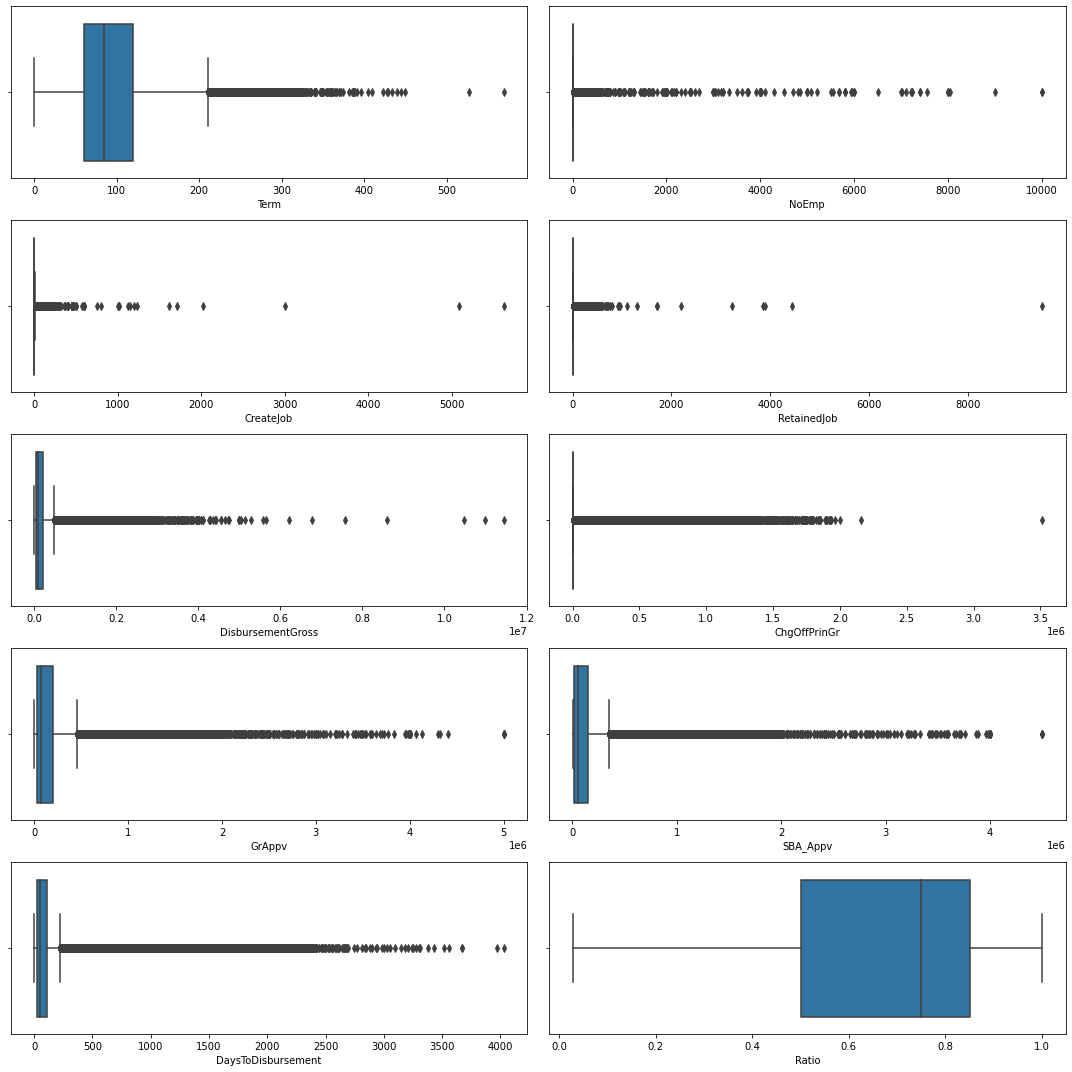

In [102]:
plt.figure(figsize=(15, 15))
for count, col in enumerate(df.describe().columns):
    plt.subplot(5, 2, count+1)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

Let's count how many outlier in each numerical column.

In [103]:
def col_outlier_count():
    for col in df.describe().columns:
        q1 = np.quantile(df[col], 0.25)
        q3 = np.quantile(df[col], 0.75)
        iqr = q3 - q1
        upperlim = q3 + 1.5 * iqr
        lowerlim = q1 - 1.5 * iqr
        print(col, 'outlier :', np.sum(df[col]<lowerlim) + np.sum(df[col]>upperlim))

col_outlier_count()

Term outlier : 99730
NoEmp outlier : 73762
CreateJob outlier : 60417
RetainedJob outlier : 61698
DisbursementGross outlier : 69757
ChgOffPrinGr outlier : 142110
GrAppv outlier : 70905
SBA_Appv outlier : 75455
DaysToDisbursement outlier : 68891
Ratio outlier : 0


In [104]:
df[df.NoEmp > 1000]

,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
1085,MI,Wholesale_trade,1997-03-05,12,2000,No,0,0,Yes,Undefined,N,1997-08-31,400000.0,P I F,0.0,400000.0,360000.0,179,0.90,No,No
6222,PA,Retail_trade,1997-03-20,36,9992,Yes,0,0,Yes,Undefined,Y,1997-04-30,55000.0,P I F,0.0,55000.0,44000.0,41,0.80,No,No
58700,TX,Retail_trade,2005-11-23,84,4000,No,1,1,No,Urban,N,2005-12-31,26000.0,P I F,0.0,26000.0,22100.0,38,0.85,No,No
61657,KY,Wholesale_trade,1997-12-11,60,8000,Yes,0,0,Yes,Undefined,Y,1997-12-31,100000.0,P I F,0.0,100000.0,80000.0,20,0.80,No,No
61725,AZ,Retail_trade,1997-09-26,237,5511,No,0,0,Yes,Undefined,N,1998-08-31,100011.0,P I F,0.0,100000.0,50000.0,339,0.50,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650658,GA,Retail_trade,1996-06-07,276,2005,No,0,0,Yes,Undefined,N,1996-09-30,475000.0,P I F,0.0,475000.0,356250.0,115,0.75,No,Yes
655152,CA,Construction,1996-08-07,60,1542,No,0,0,Yes,Undefined,N,1996-09-30,50000.0,P I F,0.0,50000.0,25000.0,54,0.50,No,No
655287,WI,Ag/For/Fish/Hunt,1996-08-08,60,1920,No,0,0,Yes,Undefined,Y,1997-10-31,80000.0,P I F,0.0,80000.0,64000.0,449,0.80,No,No
656198,CO,Wholesale_trade,1996-08-22,84,1003,No,0,0,Yes,Undefined,N,1996-10-31,500000.0,P I F,0.0,500000.0,375000.0,70,0.75,No,No


In [105]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668230 entries, 0 to 668229
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               668230 non-null  object        
 1   NAICS               668230 non-null  object        
 2   ApprovalDate        668230 non-null  datetime64[ns]
 3   Term                668230 non-null  int64         
 4   NoEmp               668230 non-null  int64         
 5   NewExist            668230 non-null  object        
 6   CreateJob           668230 non-null  int64         
 7   RetainedJob         668230 non-null  int64         
 8   FranchiseCode       668230 non-null  object        
 9   UrbanRural          668230 non-null  object        
 10  LowDoc              668230 non-null  object        
 11  DisbursementDate    668230 non-null  datetime64[ns]
 12  DisbursementGross   668230 non-null  float64       
 13  MIS_Status          668230 no

In [106]:
df.describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio
count,668230.00000,668230.00000,668230.00000,668230.00000,6.68230e+05,6.68230e+05,6.68230e+05,6.68230e+05,668230.00000,668230.00000
mean,103.33941,9.78442,2.13082,4.98373,1.91084e+05,1.49913e+04,1.79873e+05,1.38092e+05,103.74379,0.68121
std,74.92415,61.96295,14.58184,20.67828,2.82633e+05,6.87823e+04,2.77882e+05,2.26587e+05,169.22454,0.17557
min,0.00000,0.00000,0.00000,0.00000,4.00000e+03,0.00000e+00,1.00000e+03,5.00000e+02,0.00000,0.02814
25%,60.00000,2.00000,0.00000,0.00000,3.66000e+04,0.00000e+00,3.00000e+04,1.72500e+04,28.00000,0.50000
50%,84.00000,4.00000,0.00000,1.00000,9.00000e+04,0.00000e+00,7.50000e+04,5.00000e+04,51.00000,0.75000
75%,120.00000,9.00000,2.00000,5.00000,2.14000e+05,0.00000e+00,2.00000e+05,1.50000e+05,106.00000,0.85000
max,569.00000,9999.00000,5621.00000,9500.00000,1.14463e+07,3.51260e+06,5.00000e+06,4.50000e+06,4029.00000,1.00000


In [107]:
from sklearn.ensemble import IsolationForest

X_check = df[['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DaysToDisbursement']].values

clf = IsolationForest(random_state=101, n_jobs=-1, n_estimators=300)
clf.fit(X_check)

isolation_forest_outliers = clf.predict(X_check)

In [108]:
df['outlier'] = isolation_forest_outliers

C:\Users\Vicqy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
df.outlier.value_counts()

 1    591750
-1     76480
Name: outlier, dtype: int64

In [110]:
df[df.outlier == -1].MIS_Status.value_counts()

P I F     68931
CHGOFF     7549
Name: MIS_Status, dtype: int64

In [111]:
df[df.outlier == 1].describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,outlier
count,591750.00000,591750.00000,591750.00000,591750.00000,5.91750e+05,5.91750e+05,5.91750e+05,5.91750e+05,591750.00000,591750.00000,591750.0
mean,95.38425,5.84175,0.92267,2.91880,1.55099e+05,1.45323e+04,1.43505e+05,1.06500e+05,79.56122,0.66994,1.0
std,67.46729,7.08090,2.03268,4.34328,2.27960e+05,6.29999e+04,2.21749e+05,1.72849e+05,94.48428,0.16944,0.0
min,0.00000,0.00000,0.00000,0.00000,4.00000e+03,0.00000e+00,1.00000e+03,5.00000e+02,0.00000,0.05000,1.0
25%,60.00000,2.00000,0.00000,0.00000,3.50000e+04,0.00000e+00,2.50000e+04,1.50000e+04,27.00000,0.50000,1.0
50%,84.00000,3.00000,0.00000,1.00000,7.69475e+04,0.00000e+00,6.00000e+04,4.05000e+04,48.00000,0.75000,1.0
75%,105.00000,7.00000,1.00000,4.00000,1.71000e+05,0.00000e+00,1.50000e+05,1.24100e+05,94.00000,0.85000,1.0
max,569.00000,73.00000,23.00000,45.00000,1.14463e+07,3.51260e+06,5.00000e+06,4.50000e+06,891.00000,1.00000,1.0


According the _summary statistics_ there are several _insight_ we can see.
- In **Term**, the average month the loan taken is around 95 month with 68 month of standard deviation. This indicate variety term month. We can see 75% of the data is under 105 month. The longest term is 569 month.
- In **NoEmp**, there's 6 employees in average for each business with 7 in standard deviation. The highest number of employee is 73.
- On average, business only create 1 job after the loan, with 75% of the data is also have value 1 or below.
- On average there's 3 retained job for each loan.
- Each business need to ait for 80 days on average after the loan is approved.
- We can see on **ChgOffPrinGr**, percentile 75 value is 0. This indicate that 75% of the business aren't defaulted.
- SBA backed 65% amount of _loan_ proposed for each business on average.

In [112]:
df[df.outlier == 1].MIS_Status.value_counts()

P I F     461410
CHGOFF    130340
Name: MIS_Status, dtype: int64

In [113]:
## drop the outlier
df.drop(index=df[df.outlier == -1].index, inplace=True)

C:\Users\Vicqy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
df.reset_index(drop=True, inplace=True)

In [115]:
df.drop('outlier', axis=1, inplace=True)

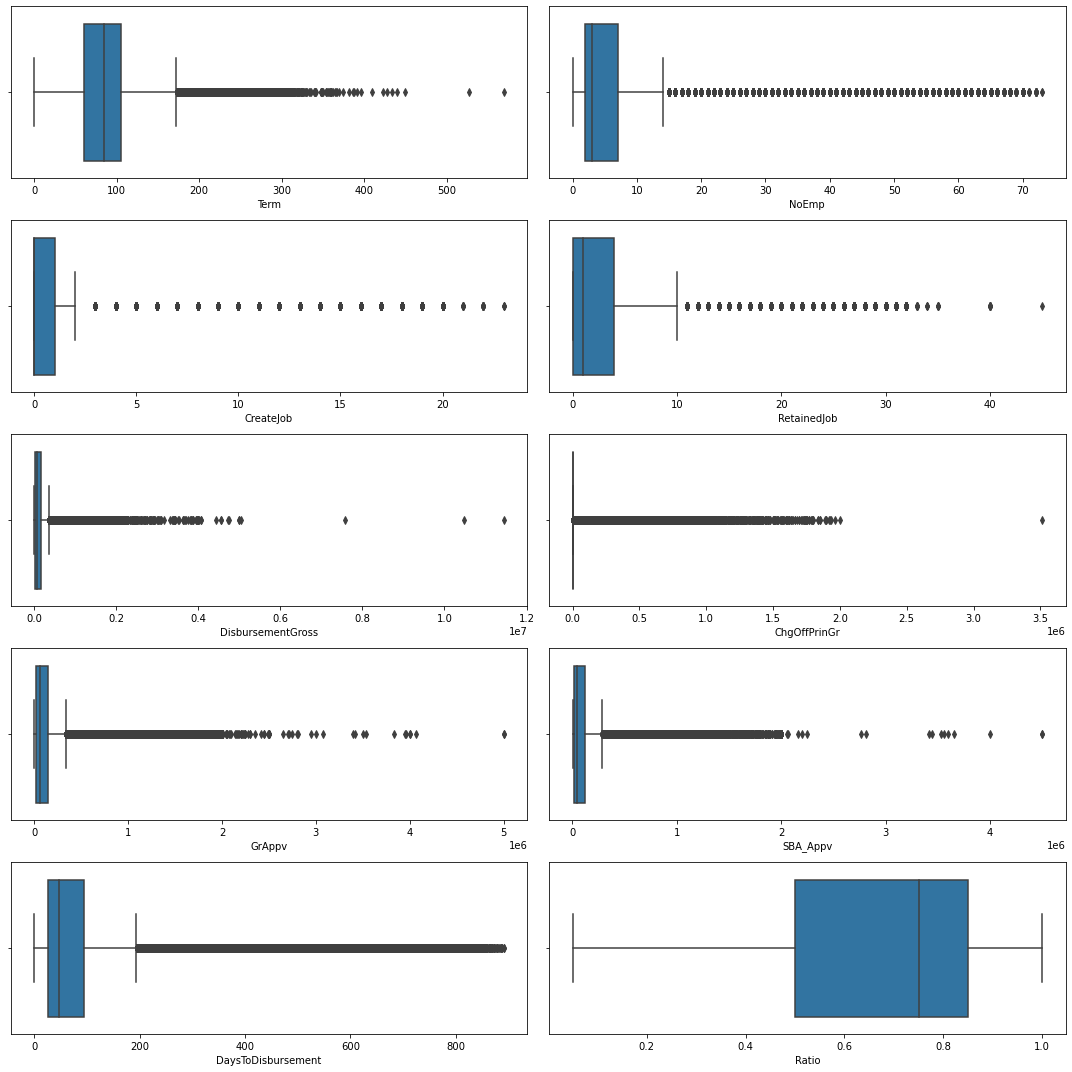

In [116]:
plt.figure(figsize=(15, 15))
for count, col in enumerate(df.describe().columns):
    plt.subplot(5, 2, count+1)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

In [117]:
def col_outlier_count():
    for col in df.describe().columns:
        q1 = np.quantile(df[col], 0.25)
        q3 = np.quantile(df[col], 0.75)
        iqr = q3 - q1
        upperlim = q3 + 1.5 * iqr
        lowerlim = q1 - 1.5 * iqr
        print(col, 'outlier :', np.sum(df[col]<lowerlim) + np.sum(df[col]>upperlim))

col_outlier_count()

Term outlier : 81883
NoEmp outlier : 53718
CreateJob outlier : 73225
RetainedJob outlier : 36791
DisbursementGross outlier : 58904
ChgOffPrinGr outlier : 134396
GrAppv outlier : 64538
SBA_Appv outlier : 57203
DaysToDisbursement outlier : 49919
Ratio outlier : 0


### Data Visualization

#### Default Rate per State

In [118]:
df_state_default_rate = df.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
df_state_default_rate['default_rate'] = df_state_default_rate['CHGOFF'] / (df_state_default_rate['CHGOFF'] + df_state_default_rate['P I F'])
df_state_default_rate.sort_values('default_rate', ascending=False)

MIS_Status,CHGOFF,P I F,default_rate
State,,,
FL,10005,19765,0.33608
NV,1586,3372,0.31989
GA,4560,9983,0.31355
DC,349,823,0.29778
MI,3961,10300,0.27775
AZ,3041,8174,0.27115
IL,5554,14994,0.27029
TN,1625,4391,0.27011
NC,2314,6731,0.25583


In [119]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_state_default_rate.index,
    z = df_state_default_rate.default_rate, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Default Rate",
))

fig.update_layout(
    title_text = 'SBA Default Rate per State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

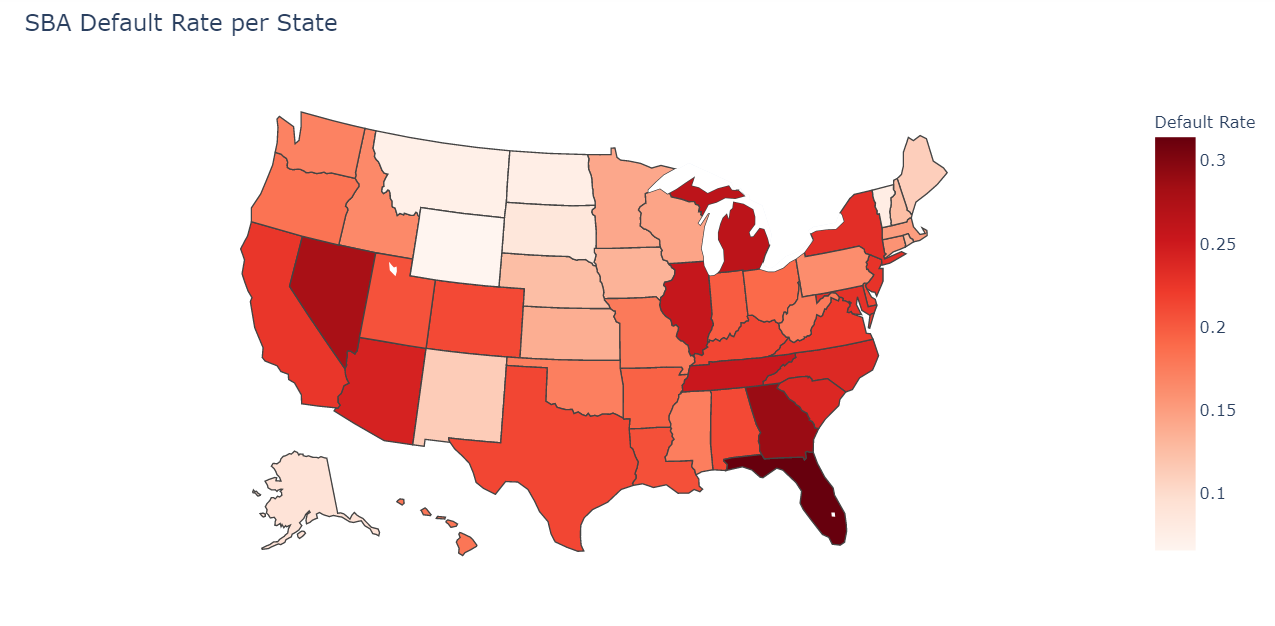

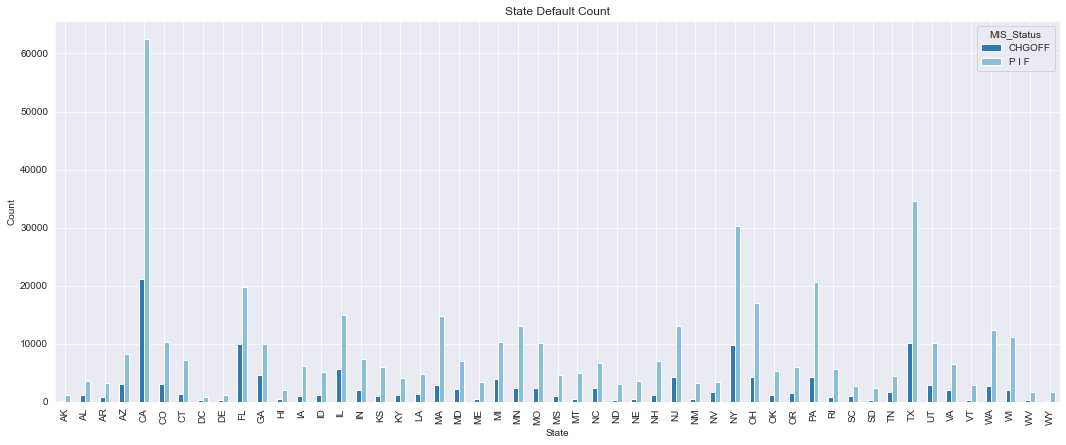

In [120]:
sns.set_style('darkgrid')
sns.set_palette('RdBu_r')
df_state_default_rate[['CHGOFF', 'P I F']].plot(kind='bar', figsize=(18, 7))
plt.ylabel('Count')
plt.title('State Default Count')
plt.show()

#### Approval to Disbursement Day for State

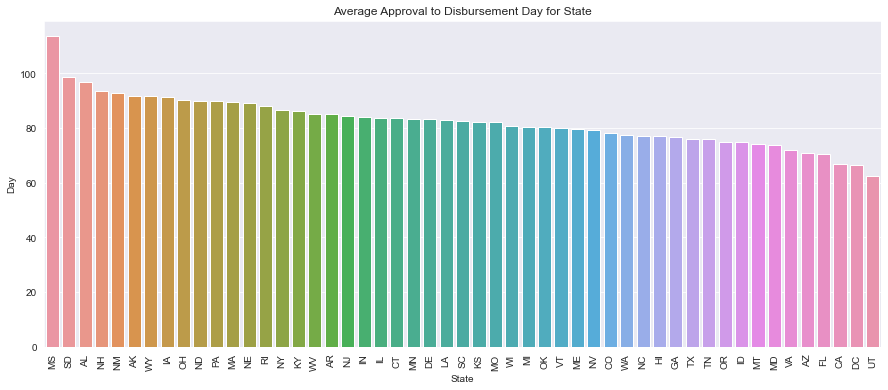

In [121]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['State']).mean().sort_values('DaysToDisbursement', ascending=False).index,
    y=df.groupby(['State']).mean().sort_values('DaysToDisbursement', ascending=False).DaysToDisbursement
)
plt.xticks(rotation=90)
plt.ylabel('Day')

plt.title('Average Approval to Disbursement Day for State')

plt.show()

According to the chart for the each States above:
- In the USA choropleth, three States with the highest default rate are FL, NV, and GA with default rate above 30%.
- Three states with lowest default ratio are ND, MT, dan WY.
- Theres a considerabel amount of deviation in the default ratio this might indicate States as an important information for the modelling process.
- CA, NY, dan TX are States with the highest amount of _loan_.
- Theres a variety in days to disbursement mean for each state, MS is the longest and UT is the shortest.

#### Default Rate per Industry

In [122]:
df_default_per_ind = df.groupby(['NAICS', 'MIS_Status'])['NAICS'].count().unstack('MIS_Status')
df_default_per_ind['default_rate'] = df_default_per_ind['CHGOFF']/(df_default_per_ind['CHGOFF'] + df_default_per_ind['P I F'])
df_default_per_ind.sort_values('default_rate', ascending=False)

MIS_Status,CHGOFF,P I F,default_rate
NAICS,,,
RE/Rental/Lease,3718,8220,0.31144
Finance/Insurance,2504,5791,0.30187
Trans/Ware,5547,13648,0.28898
Information,2657,7271,0.26763
Educational,1416,3941,0.26433
Construction,14252,41759,0.25445
Admin_sup/Waste_Mgmt_Rem,7018,20825,0.25206
Retail_trade,27579,87314,0.24004
Accom/Food_serv,12345,39102,0.23996


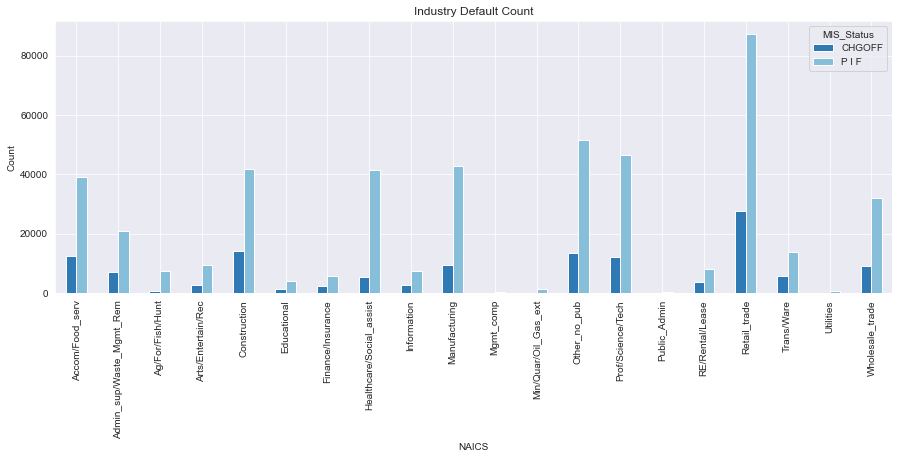

In [123]:
df_default_per_ind[['CHGOFF', 'P I F']].plot(kind='bar', figsize=(15, 5))
plt.ylabel('Count')
plt.title('Industry Default Count')
plt.show()

#### Disbursement per Industry

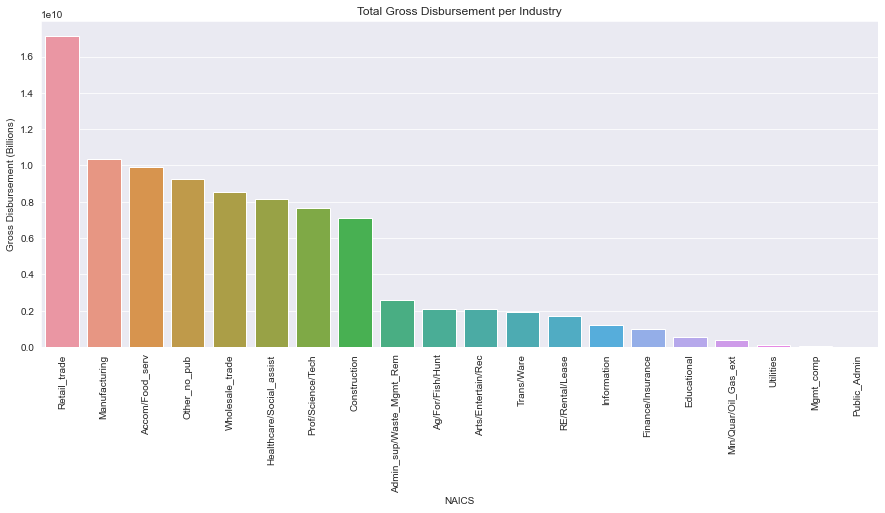

In [124]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).sum().sort_values('DisbursementGross', ascending=False).index,
    y=df.groupby(['NAICS']).sum().sort_values('DisbursementGross', ascending=False).DisbursementGross
)
plt.xticks(rotation=90)
plt.ylabel('Gross Disbursement (Billions)')

plt.title('Total Gross Disbursement per Industry')

plt.show()

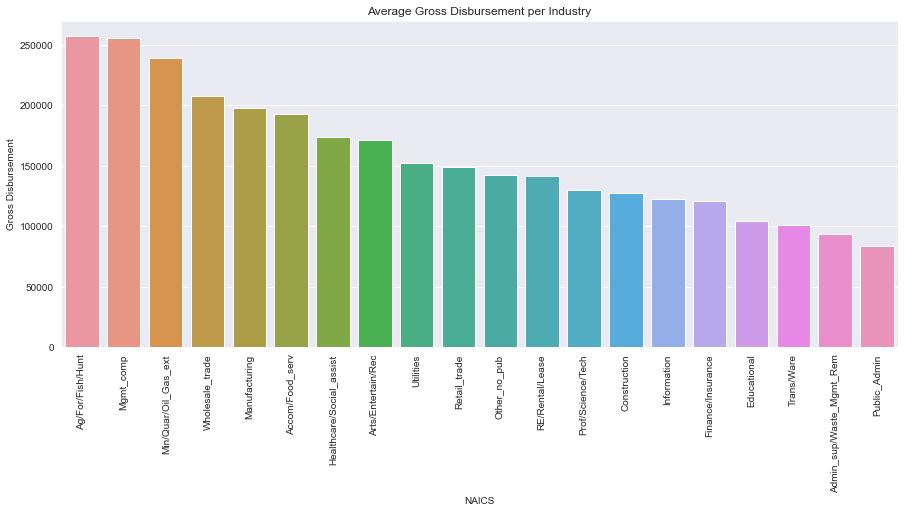

In [125]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).mean().sort_values('DisbursementGross', ascending=False).index,
    y=df.groupby(['NAICS']).mean().sort_values('DisbursementGross', ascending=False).DisbursementGross
)
plt.xticks(rotation=90)
plt.ylabel('Gross Disbursement')

plt.title('Average Gross Disbursement per Industry')

plt.show()

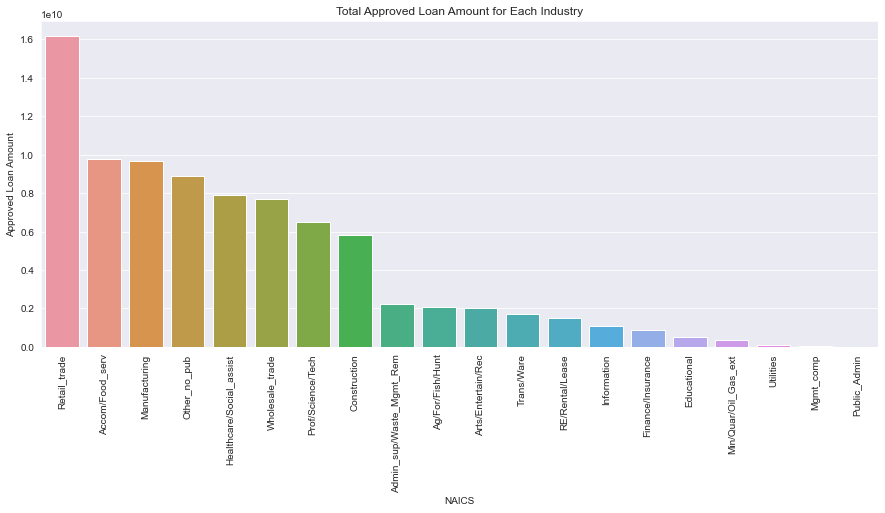

In [126]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).sum().sort_values('GrAppv', ascending=False).index,
    y=df.groupby(['NAICS']).sum().sort_values('GrAppv', ascending=False).GrAppv
)
plt.xticks(rotation=90)
plt.ylabel('Approved Loan Amount')

plt.title('Total Approved Loan Amount for Each Industry')

plt.show()

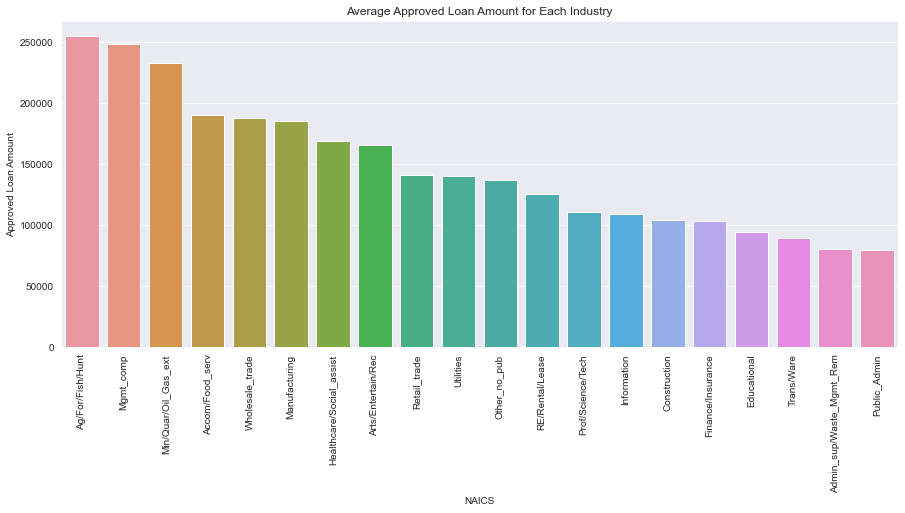

In [127]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).mean().sort_values('GrAppv', ascending=False).index,
    y=df.groupby(['NAICS']).mean().sort_values('GrAppv', ascending=False).GrAppv
)
plt.xticks(rotation=90)
plt.ylabel('Approved Loan Amount')

plt.title('Average Approved Loan Amount for Each Industry')

plt.show()

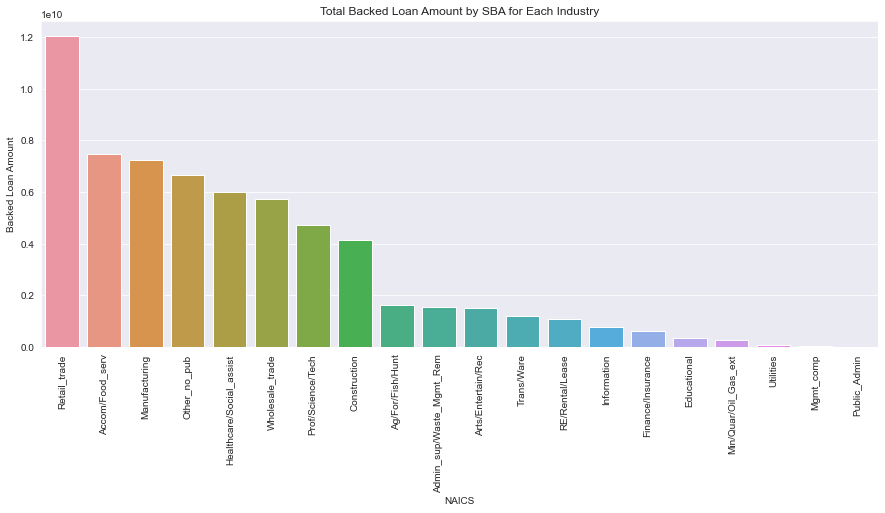

In [128]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).sum().sort_values('SBA_Appv', ascending=False).index,
    y=df.groupby(['NAICS']).sum().sort_values('SBA_Appv', ascending=False).SBA_Appv
)
plt.xticks(rotation=90)
plt.ylabel('Backed Loan Amount')

plt.title('Total Backed Loan Amount by SBA for Each Industry')

plt.show()

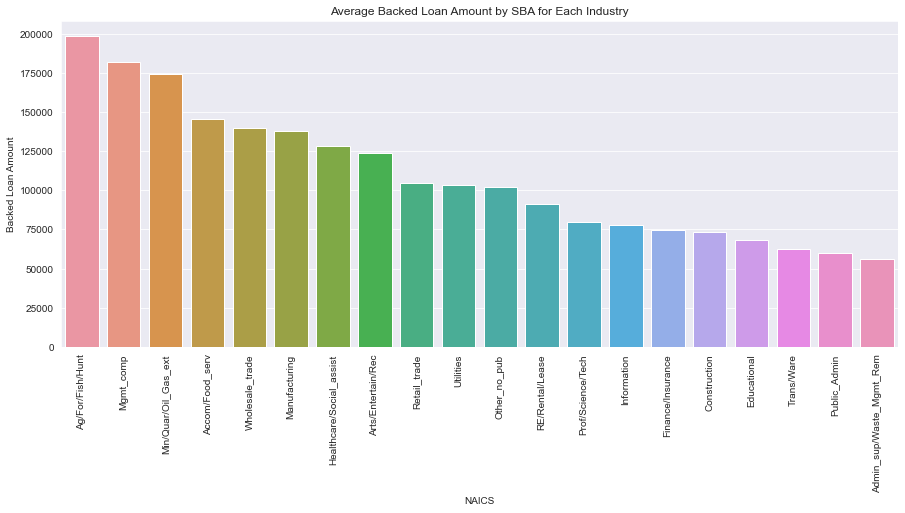

In [129]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).mean().sort_values('SBA_Appv', ascending=False).index,
    y=df.groupby(['NAICS']).mean().sort_values('SBA_Appv', ascending=False).SBA_Appv
)
plt.xticks(rotation=90)
plt.ylabel('Backed Loan Amount')

plt.title('Average Backed Loan Amount by SBA for Each Industry')

plt.show()

#### Approval to Disbursement Day for Each Industry

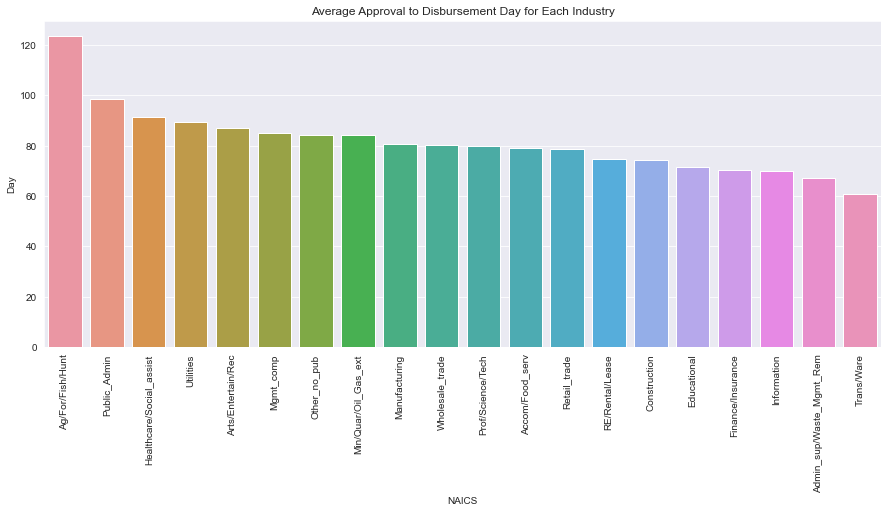

In [130]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=df.groupby(['NAICS']).mean().sort_values('DaysToDisbursement', ascending=False).index,
    y=df.groupby(['NAICS']).mean().sort_values('DaysToDisbursement', ascending=False).DaysToDisbursement
)
plt.xticks(rotation=90)
plt.ylabel('Day')

plt.title('Average Approval to Disbursement Day for Each Industry')

plt.show()

#### Default Status by Binary Column

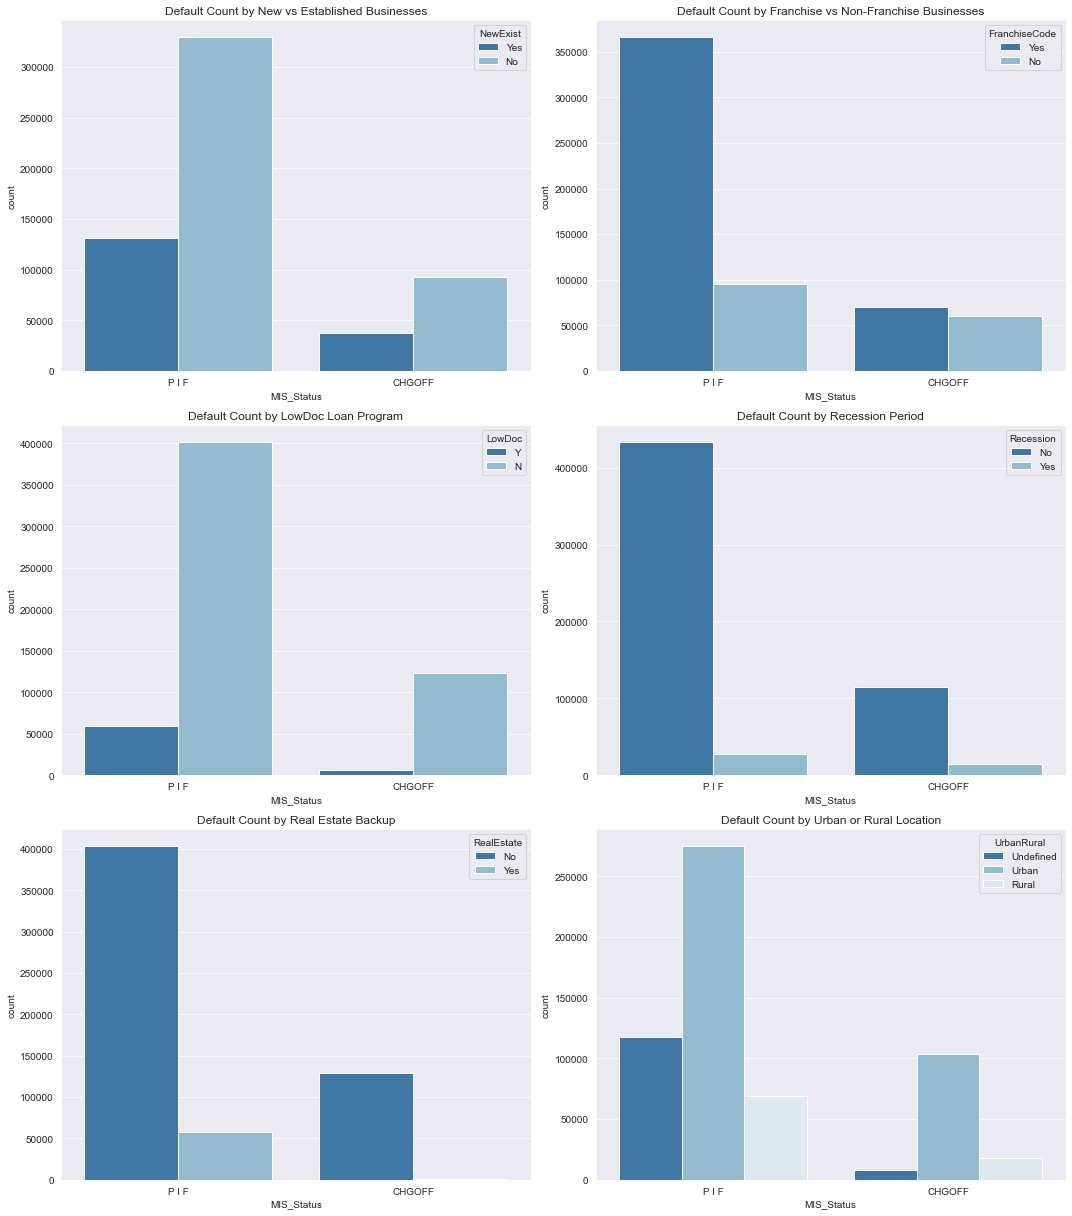

In [131]:
plt.figure(figsize=(15,17))

plt.subplot(3, 2, 1)
sns.countplot(x='MIS_Status', hue='NewExist', data=df)
plt.title('Default Count by New vs Established Businesses')

plt.subplot(3, 2, 2)
sns.countplot(x='MIS_Status', hue='FranchiseCode', data=df)
plt.title('Default Count by Franchise vs Non-Franchise Businesses')

plt.subplot(3, 2, 3)
sns.countplot(x='MIS_Status', hue='LowDoc', data=df)
plt.title('Default Count by LowDoc Loan Program')

plt.subplot(3, 2, 4)
sns.countplot(x='MIS_Status', hue='Recession', data=df)
plt.title('Default Count by Recession Period')

plt.subplot(3, 2, 5)
sns.countplot(x='MIS_Status', hue='RealEstate', data=df)
plt.title('Default Count by Real Estate Backup')

plt.subplot(3, 2, 6)
sns.countplot(x='MIS_Status', hue='UrbanRural', data=df)
plt.title('Default Count by Urban or Rural Location')

plt.tight_layout()
plt.show()

In [132]:
df.groupby(['DisbursementDate', 'MIS_Status'])['DisbursementDate'].count().unstack('MIS_Status')

MIS_Status,CHGOFF,P I F
DisbursementDate,,
1987-01-23,2.0,NaN
1987-01-26,1.0,NaN
1987-01-28,2.0,NaN
1987-01-29,1.0,NaN
1987-02-04,4.0,NaN
...,...,...
2010-12-24,NaN,3.0
2010-12-27,2.0,2.0
2010-12-28,2.0,4.0


#### Defaulted Loans by DisbursementYear

In [133]:
default_disbursement_year = pd.DataFrame(
    {
        'DisbursementYear':df.DisbursementDate.dt.year, 
        'MIS_Status':df.MIS_Status
    }
).groupby(['DisbursementYear', 'MIS_Status'])['DisbursementYear'].count().unstack('MIS_Status')

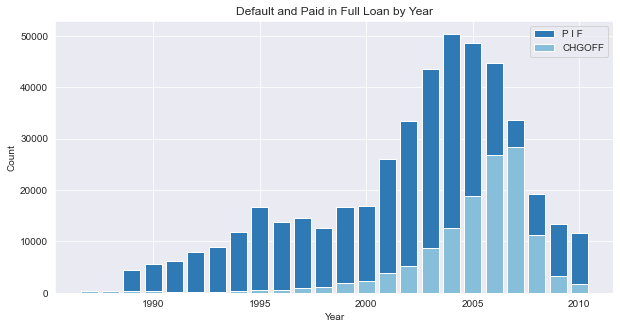

In [134]:
plt.figure(figsize=(10,5))
plt.bar(default_disbursement_year.index, default_disbursement_year['P I F'], label='P I F')
plt.bar(default_disbursement_year.index, default_disbursement_year['CHGOFF'], label='CHGOFF')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Default and Paid in Full Loan by Year')
plt.legend()
plt.show()

#### Ratio with Default Status

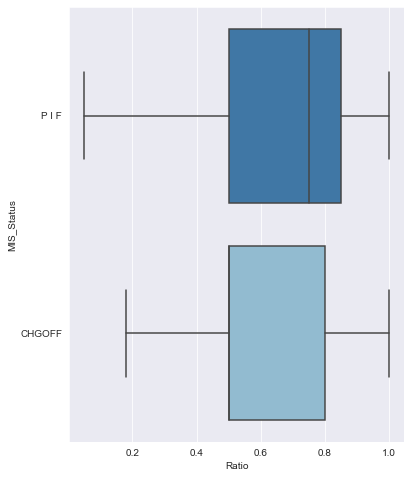

In [135]:
plt.figure(figsize=(6,8))
sns.boxplot('Ratio', 'MIS_Status', data=df)
plt.show()

In [136]:
df.groupby('MIS_Status').describe().loc[:,'Ratio']

,count,mean,std,min,25%,50%,75%,max
MIS_Status,,,,,,,,
CHGOFF,130340.0,0.62265,0.15905,0.18,0.5,0.50,0.80,1.0
P I F,461410.0,0.68330,0.16990,0.05,0.5,0.75,0.85,1.0


In [137]:
df.groupby('MIS_Status').mean()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio
MIS_Status,,,,,,,,,,
CHGOFF,52.63059,4.65069,1.09175,3.49840,111798.19313,65435.35858,96830.84651,66714.64043,53.92790,0.62265
P I F,107.46138,6.17820,0.87491,2.75507,167330.47605,153.05676,156689.23856,117738.36884,86.80217,0.68330


#### Correlation Heat Map

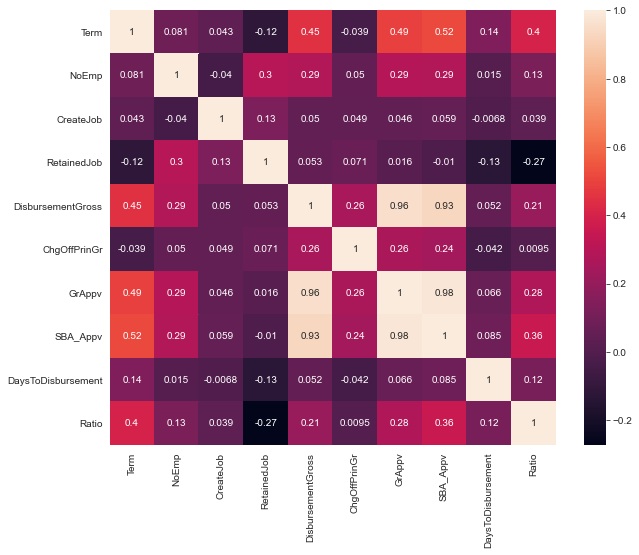

In [138]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [139]:
df

,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,1997-02-28,84,4,Yes,0,0,Yes,Undefined,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,No,No
1,IN,Accom/Food_serv,1997-02-28,60,2,Yes,0,0,Yes,Undefined,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,No,No
2,IN,Healthcare/Social_assist,1997-02-28,180,7,No,0,0,Yes,Undefined,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,No,No
3,CT,Manufacturing,1997-02-28,120,19,No,0,0,Yes,Undefined,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,No,No
4,FL,Other_no_pub,1997-02-28,84,1,Yes,0,0,Yes,Undefined,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591745,MD,Manufacturing,1997-02-27,60,20,No,0,0,Yes,Undefined,N,1997-06-30,50000.0,P I F,0.0,50000.0,25000.0,123,0.50,No,No
591746,CA,Manufacturing,1997-02-27,36,40,No,0,0,Yes,Undefined,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,No,No
591747,OH,Retail_trade,1997-02-27,60,6,No,0,0,Yes,Undefined,N,1997-09-30,70000.0,P I F,0.0,70000.0,56000.0,215,0.80,No,No
591748,OH,Retail_trade,1997-02-27,60,6,No,0,0,Yes,Undefined,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,No,No


In [140]:
df.to_csv('df_for_visualization_rev_fix.csv', index=False)

## Modelling

In [141]:
df_model = df.copy()
df_model

,State,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,1997-02-28,84,4,Yes,0,0,Yes,Undefined,Y,1999-02-28,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,No,No
1,IN,Accom/Food_serv,1997-02-28,60,2,Yes,0,0,Yes,Undefined,Y,1997-05-31,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,No,No
2,IN,Healthcare/Social_assist,1997-02-28,180,7,No,0,0,Yes,Undefined,N,1997-12-31,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,No,No
3,CT,Manufacturing,1997-02-28,120,19,No,0,0,Yes,Undefined,N,1997-06-30,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,No,No
4,FL,Other_no_pub,1997-02-28,84,1,Yes,0,0,Yes,Undefined,Y,1998-06-30,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591745,MD,Manufacturing,1997-02-27,60,20,No,0,0,Yes,Undefined,N,1997-06-30,50000.0,P I F,0.0,50000.0,25000.0,123,0.50,No,No
591746,CA,Manufacturing,1997-02-27,36,40,No,0,0,Yes,Undefined,N,1997-03-31,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,No,No
591747,OH,Retail_trade,1997-02-27,60,6,No,0,0,Yes,Undefined,N,1997-09-30,70000.0,P I F,0.0,70000.0,56000.0,215,0.80,No,No
591748,OH,Retail_trade,1997-02-27,60,6,No,0,0,Yes,Undefined,N,1997-10-31,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,No,No


In [142]:
df_model.drop(['ApprovalDate', 'DisbursementDate'], axis=1, inplace=True)

In [143]:
df_model

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,84,4,Yes,0,0,Yes,Undefined,Y,60000.0,P I F,0.0,60000.0,48000.0,730,0.80,No,No
1,IN,Accom/Food_serv,60,2,Yes,0,0,Yes,Undefined,Y,40000.0,P I F,0.0,40000.0,32000.0,92,0.80,No,No
2,IN,Healthcare/Social_assist,180,7,No,0,0,Yes,Undefined,N,287000.0,P I F,0.0,287000.0,215250.0,306,0.75,No,No
3,CT,Manufacturing,120,19,No,0,0,Yes,Undefined,N,517000.0,P I F,0.0,517000.0,387750.0,122,0.75,No,No
4,FL,Other_no_pub,84,1,Yes,0,0,Yes,Undefined,Y,45000.0,P I F,0.0,45000.0,36000.0,487,0.80,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591745,MD,Manufacturing,60,20,No,0,0,Yes,Undefined,N,50000.0,P I F,0.0,50000.0,25000.0,123,0.50,No,No
591746,CA,Manufacturing,36,40,No,0,0,Yes,Undefined,N,200000.0,P I F,0.0,200000.0,150000.0,32,0.75,No,No
591747,OH,Retail_trade,60,6,No,0,0,Yes,Undefined,N,70000.0,P I F,0.0,70000.0,56000.0,215,0.80,No,No
591748,OH,Retail_trade,60,6,No,0,0,Yes,Undefined,N,85000.0,P I F,0.0,85000.0,42500.0,246,0.50,No,No


In [144]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591750 entries, 0 to 591749
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               591750 non-null  object 
 1   NAICS               591750 non-null  object 
 2   Term                591750 non-null  int64  
 3   NoEmp               591750 non-null  int64  
 4   NewExist            591750 non-null  object 
 5   CreateJob           591750 non-null  int64  
 6   RetainedJob         591750 non-null  int64  
 7   FranchiseCode       591750 non-null  object 
 8   UrbanRural          591750 non-null  object 
 9   LowDoc              591750 non-null  object 
 10  DisbursementGross   591750 non-null  float64
 11  MIS_Status          591750 non-null  object 
 12  ChgOffPrinGr        591750 non-null  float64
 13  GrAppv              591750 non-null  float64
 14  SBA_Appv            591750 non-null  float64
 15  DaysToDisbursement  591750 non-nul

In [145]:
df_model.MIS_Status = df_model.MIS_Status.apply(lambda x: 1 if x == 'CHGOFF' else 0)

In [146]:
df_model

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,84,4,Yes,0,0,Yes,Undefined,Y,60000.0,0,0.0,60000.0,48000.0,730,0.80,No,No
1,IN,Accom/Food_serv,60,2,Yes,0,0,Yes,Undefined,Y,40000.0,0,0.0,40000.0,32000.0,92,0.80,No,No
2,IN,Healthcare/Social_assist,180,7,No,0,0,Yes,Undefined,N,287000.0,0,0.0,287000.0,215250.0,306,0.75,No,No
3,CT,Manufacturing,120,19,No,0,0,Yes,Undefined,N,517000.0,0,0.0,517000.0,387750.0,122,0.75,No,No
4,FL,Other_no_pub,84,1,Yes,0,0,Yes,Undefined,Y,45000.0,0,0.0,45000.0,36000.0,487,0.80,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591745,MD,Manufacturing,60,20,No,0,0,Yes,Undefined,N,50000.0,0,0.0,50000.0,25000.0,123,0.50,No,No
591746,CA,Manufacturing,36,40,No,0,0,Yes,Undefined,N,200000.0,0,0.0,200000.0,150000.0,32,0.75,No,No
591747,OH,Retail_trade,60,6,No,0,0,Yes,Undefined,N,70000.0,0,0.0,70000.0,56000.0,215,0.80,No,No
591748,OH,Retail_trade,60,6,No,0,0,Yes,Undefined,N,85000.0,0,0.0,85000.0,42500.0,246,0.50,No,No


In [147]:
# One hot encoding

X_column = pd.get_dummies(df_model.drop(['MIS_Status', 'ChgOffPrinGr'], axis=1), drop_first=True).columns

X = pd.get_dummies(df_model.drop('MIS_Status', axis=1), drop_first=True)
y = df_model.MIS_Status

In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [150]:
X_train = X_tr.drop('ChgOffPrinGr', axis=1).values
X_test = X_ts.drop('ChgOffPrinGr', axis=1).values

# scale the data for logistic regression
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Baseline Model

### Logistic Regression

In [151]:
# Baseline Model for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

logit = LogisticRegression(random_state=101, n_jobs=-1)

logit_cvscore = cross_val_score(logit, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
print('ROC AUC CV for Logistic Regression :')
print(logit_cvscore)

print('\nROC AUC CV STD & Mean for Logistic Regression :')
print(np.std(logit_cvscore), np.mean(logit_cvscore))

ROC AUC CV for Logistic Regression :
[0.86667289 0.86682424 0.8671251  0.86783444 0.86701349]

ROC AUC CV STD & Mean for Logistic Regression :
0.00040144914938921813 0.8670940299240406


In [152]:
logit_cvscore_recall = cross_val_score(logit, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print('Recall CV for Logistic Regression :')
print(logit_cvscore_recall)

print('\nRecall CV STD & Mean for Logistic Regression :')
print(np.std(logit_cvscore_recall), np.mean(logit_cvscore_recall))

Recall CV for Logistic Regression :
[0.49184809 0.49913686 0.49367028 0.50222968 0.49436586]

Recall CV STD & Mean for Logistic Regression :
0.0038385495018267352 0.4962501525314987


In [153]:
logit.fit(X_train, y_train)
y_logit_pred = logit.predict(X_test)
y_logit_predproba = logit.predict_proba(X_test)[:,1]

print('Classification Report :')
print(classification_report(y_test, y_logit_pred))
print('\nROC AUC Score :')
print(roc_auc_score(y_test, y_logit_predproba))

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     92282
           1       0.73      0.49      0.59     26068

    accuracy                           0.85    118350
   macro avg       0.80      0.72      0.75    118350
weighted avg       0.84      0.85      0.84    118350


ROC AUC Score :
0.8660103637386224


In [154]:
# Feature Importances for Logit
logit_feat_importance = pd.DataFrame(logit.coef_[0], columns=['Score'])
logit_feat_importance['Column'] = X_column
logit_feat_importance

,Score,Column
0,-23.47487,Term
1,-2.62223,NoEmp
2,0.41277,CreateJob
3,0.30437,RetainedJob
4,-2.95500,DisbursementGross
...,...,...
80,-1.07566,UrbanRural_Undefined
81,0.14750,UrbanRural_Urban
82,-0.50274,LowDoc_Y
83,0.16528,Recession_Yes


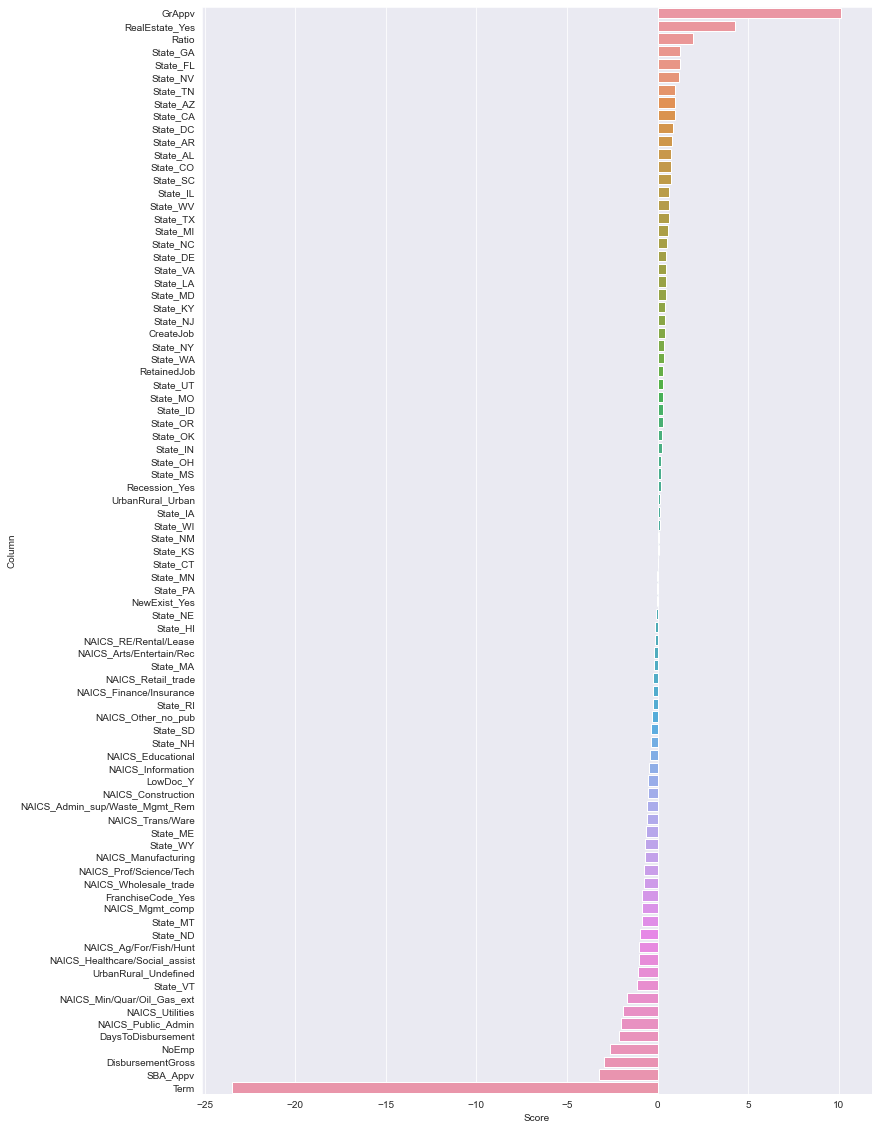

In [155]:
plt.figure(figsize=(12,20))
sns.barplot(data=logit_feat_importance.sort_values(by=['Score'],ascending=False),x='Score',y='Column')
plt.show()

### XGBoost

In [156]:
# Baseline Model for XGBClassifier
from xgboost import XGBClassifier

X_tr, X_ts, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

X_train = X_tr.drop('ChgOffPrinGr', axis=1).values
X_test = X_ts.drop('ChgOffPrinGr', axis=1).values

xgb = XGBClassifier(random_state=101, n_jobs=-1)

print('ROC AUC for XGBoost :')
xgb_cvscore = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
print(xgb_cvscore)

print('XGB ROC AUC Score Std & Mean :')
print(np.std(xgb_cvscore), np.mean(xgb_cvscore))

C:\Users\Vicqy\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



ROC AUC for XGBoost :
[0.97679443 0.97681308 0.97569511 0.97639822 0.97701165]
XGB ROC AUC Score Std & Mean :
0.0004681184082618539 0.9765424972488732


In [157]:
xgb_cvscore_recall = cross_val_score(xgb, X_train, y_train, scoring='recall', cv=5, n_jobs=-1, )
print('Recall CV for XGBoost :')
print(xgb_cvscore_recall)

print('\nRecall CV STD & Mean for XGBoost :')
print(np.std(xgb_cvscore_recall), np.mean(xgb_cvscore_recall))

Recall CV for XGBoost :
[0.85292989 0.85700585 0.85993095 0.86156797 0.8561496 ]

Recall CV STD & Mean for XGBoost :
0.0030136386663217303 0.8575168531929249


In [158]:
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
y_xgb_predproba = xgb.predict_proba(X_test)[:,1]

print('Classification Report :')
print(classification_report(y_test, y_xgb_pred))
print('\nROC AUC Score :')
print(roc_auc_score(y_test, y_xgb_predproba))

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     92282
           1       0.87      0.85      0.86     26068

    accuracy                           0.94    118350
   macro avg       0.92      0.91      0.91    118350
weighted avg       0.94      0.94      0.94    118350


ROC AUC Score :
0.9764385681646305


In [159]:
# Feature Importances for XGB
xgb_feat_importance = pd.DataFrame(xgb.feature_importances_, columns=['Score'])
xgb_feat_importance['Column'] = X_column
xgb_feat_importance

,Score,Column
0,0.14957,Term
1,0.00512,NoEmp
2,0.00647,CreateJob
3,0.01620,RetainedJob
4,0.00987,DisbursementGross
...,...,...
80,0.05862,UrbanRural_Undefined
81,0.02952,UrbanRural_Urban
82,0.01961,LowDoc_Y
83,0.01168,Recession_Yes


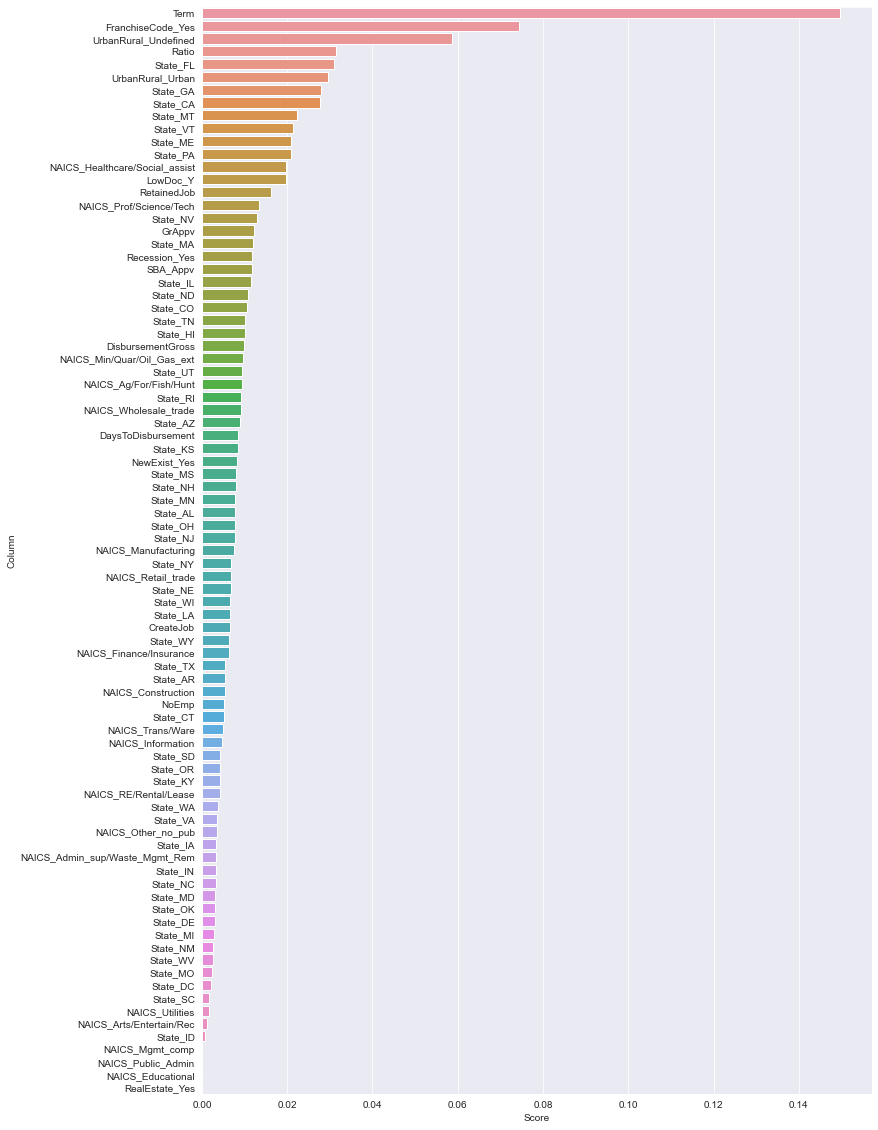

In [160]:
plt.figure(figsize=(12,20))
sns.barplot(data=xgb_feat_importance.sort_values(by=['Score'],ascending=False),x='Score',y='Column')
plt.show()

### Random Forest

In [161]:
# Baseline Model for Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=101, n_jobs=-1)

rfc_cvscore = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)

print('ROC AUC for Random Forest Classifier :')
print(rfc_cvscore)
print('\nRandom Forest Classifier ROC AUC Score Std & Mean:')
print(np.std(rfc_cvscore), np.mean(rfc_cvscore))

ROC AUC for Random Forest Classifier :
[0.96214189 0.9619186  0.96143814 0.96222091 0.96188643]

Random Forest Classifier ROC AUC Score Std & Mean:
0.00027316466368678766 0.9619211945344596


In [162]:
rfc_cvscore_recall = cross_val_score(rfc, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)

print('Recall for Random Forest Classifier :')
print(rfc_cvscore_recall)
print('\nRandom Forest Classifier Recall Std & Mean:')
print(np.std(rfc_cvscore_recall), np.mean(rfc_cvscore_recall))

Recall for Random Forest Classifier :
[0.77850772 0.77515105 0.77778843 0.78427236 0.77784704]

Random Forest Classifier Recall Std & Mean:
0.0030080154322045106 0.7787133200403201


In [163]:
rfc.fit(X_train, y_train)

y_rfc_pred = rfc.predict(X_test)
y_rfc_predproba = rfc.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_rfc_pred))
print(roc_auc_score(y_test, y_rfc_predproba))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     92282
           1       0.87      0.78      0.82     26068

    accuracy                           0.93    118350
   macro avg       0.91      0.87      0.89    118350
weighted avg       0.92      0.93      0.93    118350

0.9625461395364576


In [164]:
# Feature Importances for Random Forest Classifier
rfc_feat_importance = pd.DataFrame(rfc.feature_importances_, columns=['Score'])
rfc_feat_importance['Column'] = X_column
rfc_feat_importance

,Score,Column
0,0.44039,Term
1,0.03356,NoEmp
2,0.01881,CreateJob
3,0.03533,RetainedJob
4,0.05737,DisbursementGross
...,...,...
80,0.01100,UrbanRural_Undefined
81,0.01185,UrbanRural_Urban
82,0.00369,LowDoc_Y
83,0.00597,Recession_Yes


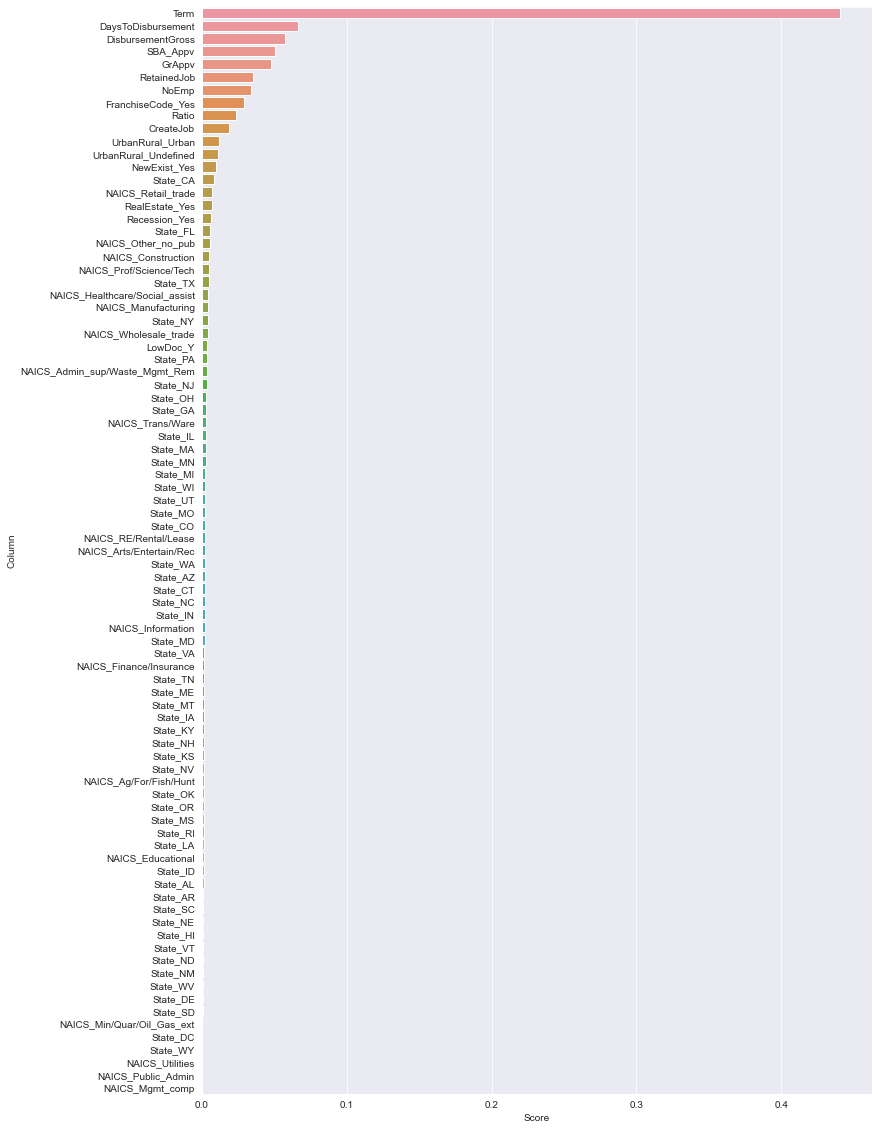

In [165]:
plt.figure(figsize=(12,20))
sns.barplot(data=rfc_feat_importance.sort_values(by=['Score'],ascending=False),x='Score',y='Column')
plt.show()

In [166]:
{'LogReg' : np.mean(logit_cvscore), 'XGBoost' : np.mean(xgb_cvscore), 'RandomForest' : np.mean(rfc_cvscore)}

{'LogReg': 0.8670940299240406,
 'XGBoost': 0.9765424972488732,
 'RandomForest': 0.9619211945344596}

In [167]:
pd.DataFrame({
    'Mean AUC' : [np.mean(logit_cvscore), np.mean(xgb_cvscore), np.mean(rfc_cvscore)],
    'AUC STD' : [np.std(logit_cvscore), np.std(xgb_cvscore), np.std(rfc_cvscore)],
    'Mean Recall' : [np.mean(logit_cvscore_recall), np.mean(xgb_cvscore_recall), np.mean(rfc_cvscore_recall)],
    'Recall STD' : [np.std(logit_cvscore_recall), np.std(xgb_cvscore_recall), np.std(rfc_cvscore_recall)]
}, index=['Logreg', 'XGB', 'RFC'])

,Mean AUC,AUC STD,Mean Recall,Recall STD
Logreg,0.86709,0.00040,0.49625,0.00384
XGB,0.97654,0.00047,0.85752,0.00301
RFC,0.96192,0.00027,0.77871,0.00301


According to the baseline model result for each model, we can conclude that XGBosst have the best performance in terms of recall and roc auc metrics. Therefore this model will be the one that we will optimize and chose as the best model.

### Optimizing XGBoost Classifier

#### Optimizing 1

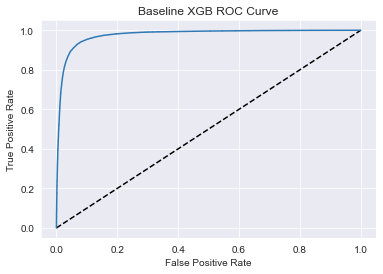

In [179]:
# Baseline XGB
from sklearn.metrics import roc_curve
fpr1, tpr1, threshold1 = roc_curve(y_test, y_xgb_predproba)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr1, tpr1, label='Baseline XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline XGB ROC Curve')
plt.show()

In [206]:
baseline_roc = pd.DataFrame({'tpr':tpr1, 'fpr':fpr1, 'threshold':threshold1})
baseline_roc

,tpr,fpr,threshold
0,0.00000,0.00000,1.99646
1,0.00004,0.00000,0.99646
2,0.00100,0.00000,0.99478
3,0.00100,0.00001,0.99473
4,0.00410,0.00001,0.99271
...,...,...,...
14329,1.00000,0.99768,0.00015
14330,1.00000,0.99770,0.00015
14331,1.00000,0.99940,0.00010
14332,1.00000,0.99943,0.00010


In [235]:
# threshold picking
print('XGB Train Data')
print(classification_report(y_train, list(map(lambda x: 1 if x == True else 0, (xgb.predict_proba(X_train)[:,1] >= 0.4)))))
print('\nXGB Test Data')
print(classification_report(y_test, list(map(lambda x: 1 if x == True else 0, (xgb.predict_proba(X_test)[:,1] >= 0.4)))))
print('\nXGB All Data')
print(classification_report(y, list(map(lambda x: 1 if x == True else 0, (xgb.predict_proba(X.drop('ChgOffPrinGr', axis=1).values)[:,1] >= 0.4)))))

XGB Train Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    369128
           1       0.86      0.90      0.88    104272

    accuracy                           0.95    473400
   macro avg       0.91      0.93      0.92    473400
weighted avg       0.95      0.95      0.95    473400


XGB Test Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     92282
           1       0.85      0.89      0.87     26068

    accuracy                           0.94    118350
   macro avg       0.91      0.92      0.92    118350
weighted avg       0.94      0.94      0.94    118350


XGB All Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    461410
           1       0.86      0.90      0.88    130340

    accuracy                           0.94    591750
   macro avg       0.91      0.93      0.92    591750
weighted avg       0.95      0

In [242]:
df_calculate = df_model.copy()
df_calculate

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate
0,IN,Retail_trade,84,4,Yes,0,0,Yes,Undefined,Y,60000.0,0,0.0,60000.0,48000.0,730,0.80,No,No
1,IN,Accom/Food_serv,60,2,Yes,0,0,Yes,Undefined,Y,40000.0,0,0.0,40000.0,32000.0,92,0.80,No,No
2,IN,Healthcare/Social_assist,180,7,No,0,0,Yes,Undefined,N,287000.0,0,0.0,287000.0,215250.0,306,0.75,No,No
3,CT,Manufacturing,120,19,No,0,0,Yes,Undefined,N,517000.0,0,0.0,517000.0,387750.0,122,0.75,No,No
4,FL,Other_no_pub,84,1,Yes,0,0,Yes,Undefined,Y,45000.0,0,0.0,45000.0,36000.0,487,0.80,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591745,MD,Manufacturing,60,20,No,0,0,Yes,Undefined,N,50000.0,0,0.0,50000.0,25000.0,123,0.50,No,No
591746,CA,Manufacturing,36,40,No,0,0,Yes,Undefined,N,200000.0,0,0.0,200000.0,150000.0,32,0.75,No,No
591747,OH,Retail_trade,60,6,No,0,0,Yes,Undefined,N,70000.0,0,0.0,70000.0,56000.0,215,0.80,No,No
591748,OH,Retail_trade,60,6,No,0,0,Yes,Undefined,N,85000.0,0,0.0,85000.0,42500.0,246,0.50,No,No


In [243]:
df_calculate['Predict'] = (df_model.MIS_Status.values == list(map(lambda x: 1 if x == True else 0,
                                        (xgb.predict_proba(X.drop('ChgOffPrinGr', axis=1).values)[:,1] >= 0.4))))
df_calculate

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Ratio,Recession,RealEstate,Predict
0,IN,Retail_trade,84,4,Yes,0,0,Yes,Undefined,Y,60000.0,0,0.0,60000.0,48000.0,730,0.80,No,No,True
1,IN,Accom/Food_serv,60,2,Yes,0,0,Yes,Undefined,Y,40000.0,0,0.0,40000.0,32000.0,92,0.80,No,No,True
2,IN,Healthcare/Social_assist,180,7,No,0,0,Yes,Undefined,N,287000.0,0,0.0,287000.0,215250.0,306,0.75,No,No,True
3,CT,Manufacturing,120,19,No,0,0,Yes,Undefined,N,517000.0,0,0.0,517000.0,387750.0,122,0.75,No,No,True
4,FL,Other_no_pub,84,1,Yes,0,0,Yes,Undefined,Y,45000.0,0,0.0,45000.0,36000.0,487,0.80,No,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591745,MD,Manufacturing,60,20,No,0,0,Yes,Undefined,N,50000.0,0,0.0,50000.0,25000.0,123,0.50,No,No,True
591746,CA,Manufacturing,36,40,No,0,0,Yes,Undefined,N,200000.0,0,0.0,200000.0,150000.0,32,0.75,No,No,True
591747,OH,Retail_trade,60,6,No,0,0,Yes,Undefined,N,70000.0,0,0.0,70000.0,56000.0,215,0.80,No,No,True
591748,OH,Retail_trade,60,6,No,0,0,Yes,Undefined,N,85000.0,0,0.0,85000.0,42500.0,246,0.50,No,No,True


In [252]:
print('Total Amount of Loss Prevented ($) :', np.sum(df_calculate[(df_calculate.Predict == True)
                                                                   & (df_calculate.MIS_Status == 1)].ChgOffPrinGr.values))

Total Amount of Loss Prevented ($) : 7089309033.0


#### Optimizing 2

Let's try dropping a few features such as:
- CreateJob
- RetainedJob
- LowDoc
- DisbursementGross
- ChgOffPrinGr
- DaysToDisbursement
- RealEstate
- Recession

In [255]:
df_try_2 = df_model.drop(['CreateJob', 'RetainedJob', 'LowDoc', 'DisbursementGross',
                          'DaysToDisbursement', 'Recession', 'RealEstate'], axis=1)
X_try_2 = pd.get_dummies(df_try_2.drop(['MIS_Status', 'ChgOffPrinGr'], axis=1), drop_first=True)
y_try_2 = df_try_2.MIS_Status

X_tr_try_2, X_ts_try_2, y_train_try_2, y_test_try_2 = train_test_split(X_try_2, y_try_2, test_size=0.2, random_state=101, stratify=y)

xgb_try_2 = XGBClassifier(random_state=101, n_jobs=-1)

In [257]:
xgb_try_2.fit(X_tr_try_2, y_train_try_2)
y_xgb_try_2_pred = xgb_try_2.predict(X_ts_try_2)
y_xgb_try_2_predproba = xgb_try_2.predict_proba(X_ts_try_2)[:,1]

print('Classification Report :')
print(classification_report(y_test_try_2, y_xgb_try_2_pred))
print('\nROC AUC Score :')
print(roc_auc_score(y_test_try_2, y_xgb_try_2_predproba))

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     92282
           1       0.87      0.85      0.86     26068

    accuracy                           0.94    118350
   macro avg       0.91      0.91      0.91    118350
weighted avg       0.94      0.94      0.94    118350


ROC AUC Score :
0.9751183613446288


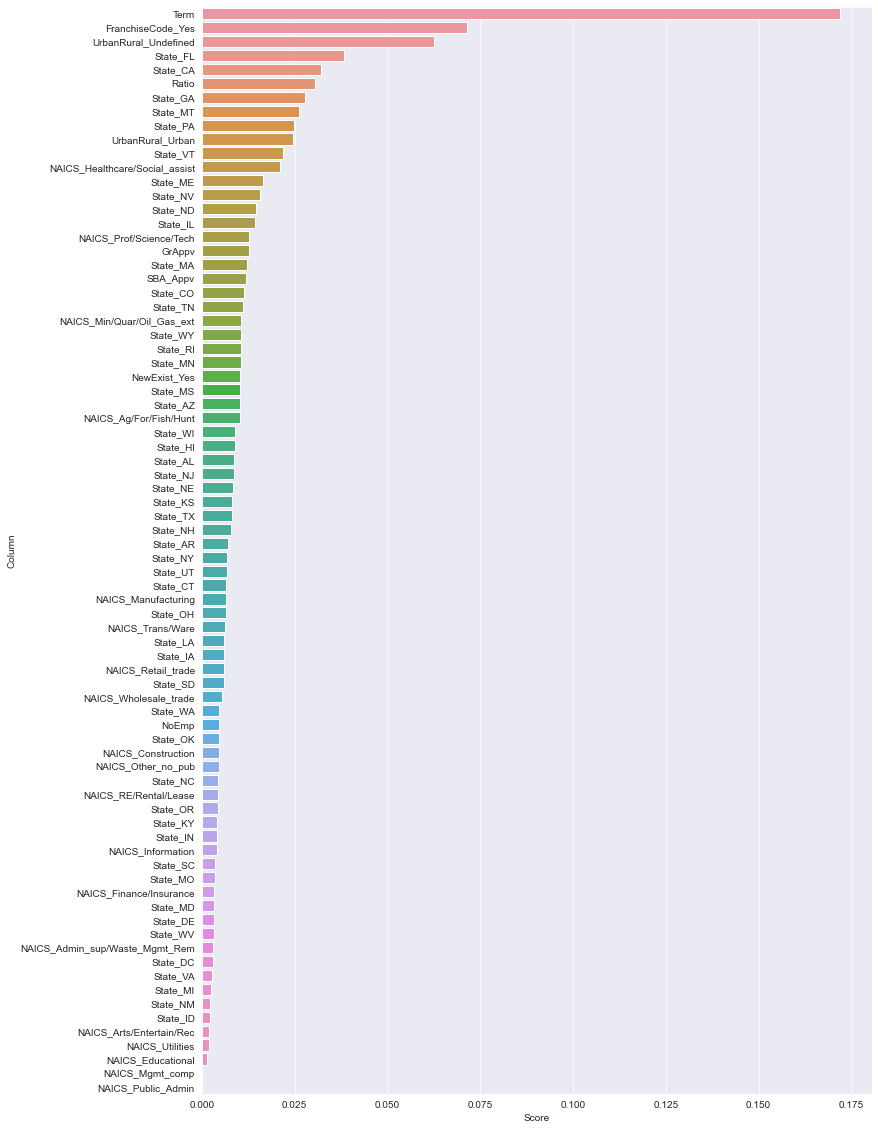

In [259]:
xgb_try_2_feat_importance = pd.DataFrame(xgb_try_2.feature_importances_, columns=['Score'])
xgb_try_2_feat_importance['Column'] = X_try_2.columns

plt.figure(figsize=(12,20))
sns.barplot(data=xgb_try_2_feat_importance.sort_values(by=['Score'],ascending=False),x='Score',y='Column')
plt.show()

There seems no significant differences in lowering the amount of column used. On the next notebook we will try to drop a several column and chose column that only relevant only at the start of the loan.